#### Exploratory Data Analysis 

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [75]:
plt.rc("font", size=8)
sns.set_theme(style="white")
sns.set_theme(style="whitegrid", color_codes=True)

Combine the two files

In [76]:
temp1 = pd.DataFrame()
temp2 = pd.DataFrame()

In [77]:

cpd_data = pd.read_csv("cpd.csv")

print(cpd_data.shape)
#print(cpd_data.columns)

cpd_data = cpd_data.dropna(subset=['23. Yes, I will consider the use of contraception \n\n*Natural (abstinence, withdrawal, calendar method, etc.)\n*Modern (oral pills, condoms, injectables, IUD, implant, ligation, vasectomy, etc.)'])

temp1['age'] = cpd_data['6. How old are you? ']
temp1['job'] = cpd_data['job type']
temp1['educ'] = cpd_data['educ']
temp1['female'] = cpd_data['female']
temp1['genderid'] = cpd_data['genderid']
temp1['loc'] = cpd_data['loc']
temp1['device'] = cpd_data['devices']
temp1['purpose'] = cpd_data['purpose page']
temp1['rh_needs'] = cpd_data['perceived rh needs']
temp1['benefit'] = cpd_data['benefitnum']
temp1['platforms'] = cpd_data['platforms']
temp1['oftenvisit'] = cpd_data['oftenvisit']
temp1['learnpage'] = cpd_data['learnpage']
temp1['contents'] = cpd_data['contents']
temp1['visuals'] = cpd_data['visuals']
temp1['civil'] = cpd_data['civil']
temp1['social'] = cpd_data['social']
temp1['conversion3_'] = cpd_data['23. Yes, I will consider the use of contraception \n\n*Natural (abstinence, withdrawal, calendar method, etc.)\n*Modern (oral pills, condoms, injectables, IUD, implant, ligation, vasectomy, etc.)']

temp1['conversion3'] = temp1['conversion3_'].apply(lambda x: 1 if x == 'Modern (Makabago)' else 0 )
temp1.drop(columns=['conversion3_'], inplace=True)

temp1['tag'] = 0
print(temp1.tail())

(650, 74)
     age  job  educ  female  genderid  loc  device  purpose  rh_needs  \
643   24    2     1       1         4    1       1        1         4   
644   18    4     4       1         1    1       1        1         1   
645   25    1     1       1         1    1       1        1         1   
646   20    4     2       1         1    1       0        3         1   
649   26    2     1       1         1    1       1        1         1   

     benefit  platforms  oftenvisit  learnpage  contents  visuals  civil  \
643        5          1           4          1         1        5    NaN   
644        1          2           3          1         1        5    NaN   
645        5          1           5          1         1        5    NaN   
646        1          1           1          1         1        4    NaN   
649        1          1           5          1         3        3    NaN   

     social  conversion3  tag  
643     NaN            1    0  
644     NaN            1    0 

In [78]:

Bayer_data = pd.read_csv("Bayer.csv")

print(Bayer_data.shape)
#print(Bayer_data.columns)
Bayer_data = Bayer_data.dropna(subset=['Yes, I will consider the use of contraception'])

temp2['age'] = Bayer_data['How old are you?']
temp2['job'] = Bayer_data['Job Title']
temp2['educ'] = Bayer_data['Educ']
temp2['female'] = Bayer_data['Female']
temp2['genderid'] = Bayer_data['GenderID']
temp2['loc'] = Bayer_data['Loc']
temp2['device'] = Bayer_data['Devices']
temp2['purpose'] = Bayer_data['Purpose Page']
temp2['rh_needs'] = Bayer_data['perceived rh needs']
temp2['benefit'] = Bayer_data['Benefit Number']
temp2['platforms'] = Bayer_data['platforms']
temp2['oftenvisit'] = Bayer_data['Often Visit']
temp2['learnpage'] = Bayer_data['Learnpage']
temp2['contents'] = Bayer_data['Contents']
temp2['visuals'] = Bayer_data['Visuals']
temp2['civil'] = Bayer_data['Civil']
temp2['social'] = Bayer_data['Social']
temp2['conversion3_'] = Bayer_data['Yes, I will consider the use of contraception']

temp2['conversion3'] = temp2['conversion3_'].apply(lambda x: 1 if x == 'Modern' else 0 )
temp2.drop(columns=['conversion3_'], inplace=True)

temp2['tag'] = 1
print(temp2.tail())

(495, 101)
     age  job  educ  female  genderid  loc  device  purpose  rh_needs  \
490   24    3     3       1         1    4       1        2         1   
491   19    5     5       1         1    2       1        2         1   
492   35    3     3       0         2    4       1        2         3   
493   30    5     4       0         2    1       0        4         1   
494   34    3     1       1         1    1       1        2         1   

     benefit  platforms  oftenvisit  learnpage  contents  visuals  civil  \
490        5          1           2          1         4        4    2.0   
491        5          1           2          1         4        5    1.0   
492        5          1           2          1         6        6    1.0   
493        1          1           1          1         1        1    1.0   
494        1          1           2          4         6        1    3.0   

     social  conversion3  tag  
490       1            1    1  
491       1            1    1

Merge both dataframe

In [79]:
cdata1 = pd.concat([temp1, temp2], ignore_index=True)
cdata1 = cdata1.dropna()

print(cdata1.head())
print(cdata1.shape)

   age  job  educ  female  genderid  loc  device  purpose  rh_needs  benefit  \
0   34    3     2       1         1    1       1        1         1        1   
1   25    2     2       1         3    1       1        1         4        5   
2   32    2     3       1         1    1       1        2         4        1   
3   31    2     1       1         1    1       1        3         1        1   
4   24    2     1       1         1    1       1        1         4        1   

   platforms  oftenvisit  learnpage  contents  visuals  civil  social  \
0          1           5          1         1        4    1.0     0.0   
1          2           5          2         2        2    2.0     1.0   
2          1           2          1         3        6    1.0     1.0   
3          1           1          2         3        6    1.0     1.0   
4          1           5          1         1        2    1.0     1.0   

   conversion3  tag  
0            1    0  
1            1    0  
2            1

In [80]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
temp = pd.DataFrame()

### Modern Methods

#### Demographics

Total respondents at the third conversion: **827**

##### Add only the demographics parameters

Visualize correlogram

<Figure size 1000x1000 with 0 Axes>

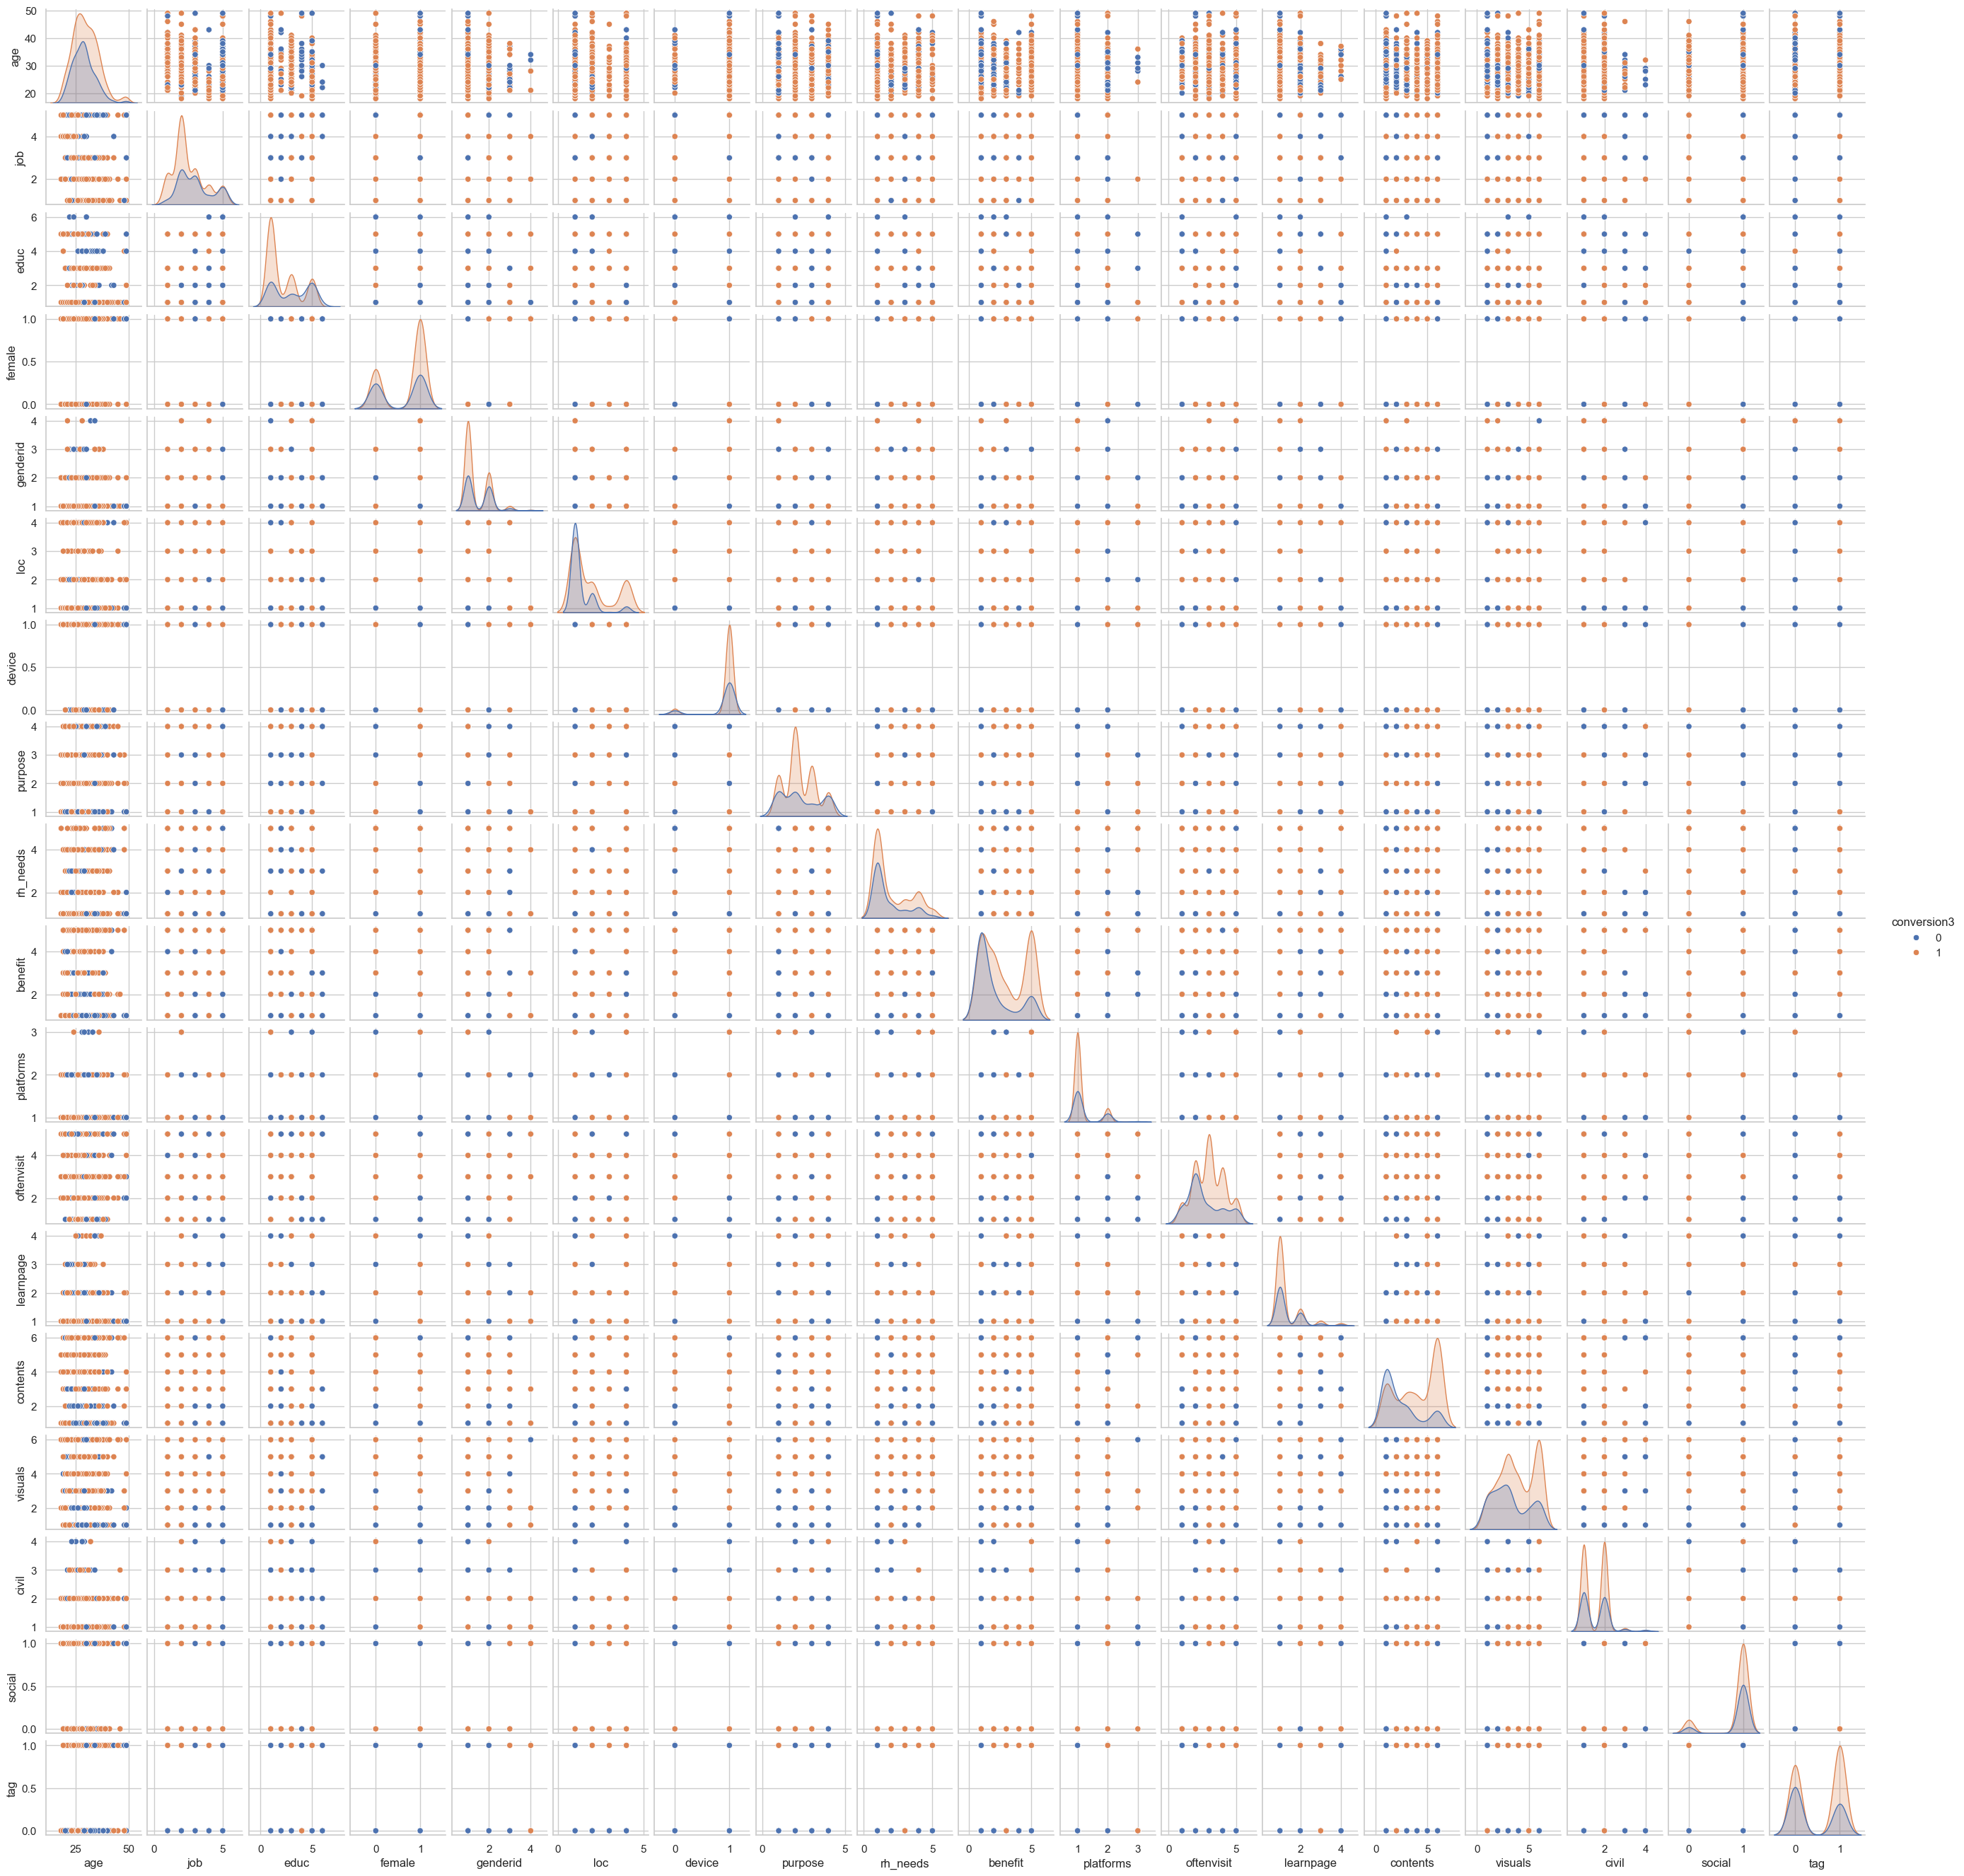

In [81]:
plt.figure(figsize=(10,10))
sns.pairplot(cdata1, hue='conversion3', height=1.5)
plt.show()

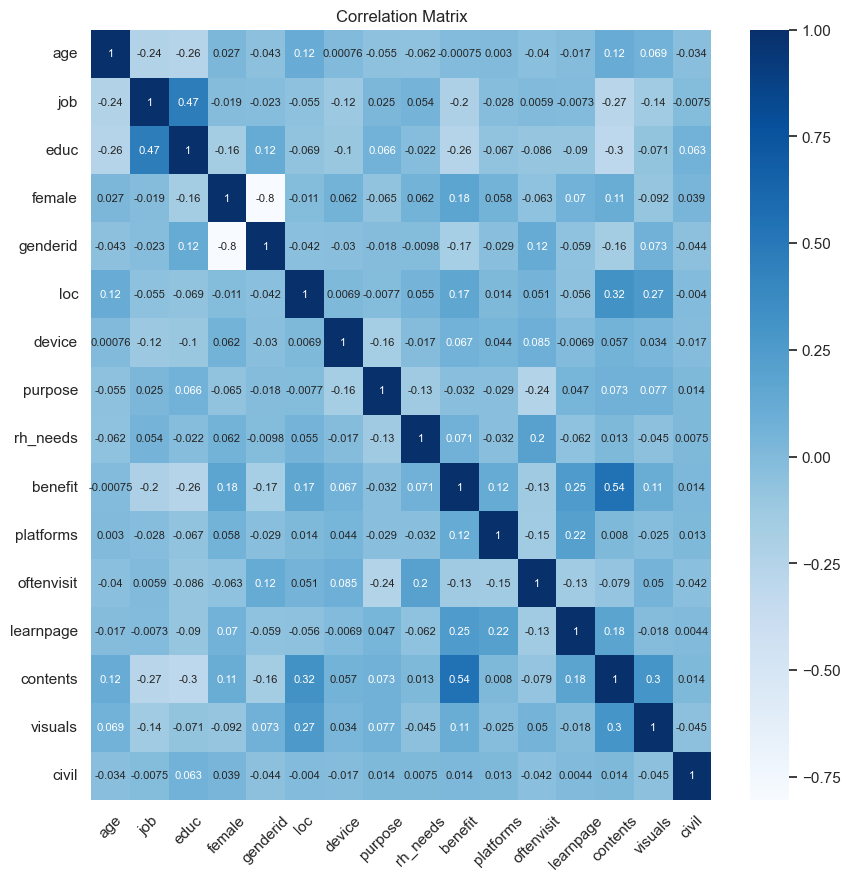

In [82]:
corr_matrix = cdata1.iloc[:,:16].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', annot_kws={"size":8})
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

here the genderid and female are closely related to each other. For firther analysis, one of these two parameter may be removed <br/>
also, educ and job are related <br/> 
contents and benefits are related

##### Investigate missing values and uniqueness

Text(0.5, 1.0, 'Missing values heatmap')

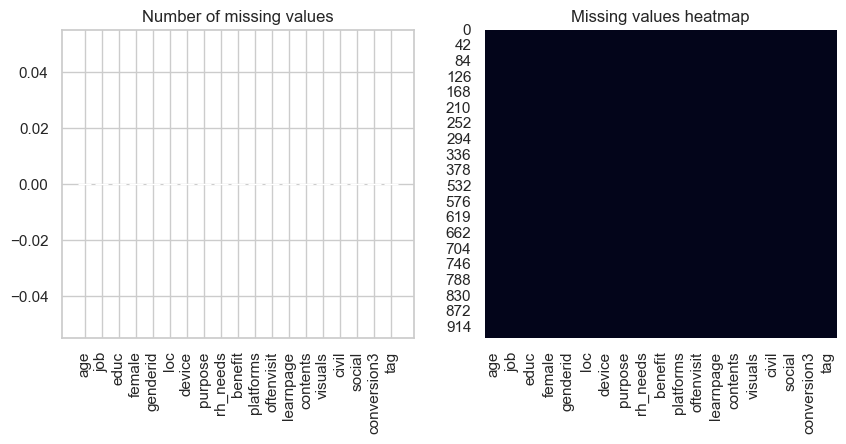

In [83]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.bar(cdata1.columns.values, cdata1.isnull().sum())
plt.xticks(rotation=90)
plt.title("Number of missing values")
plt.subplot(122)
sns.heatmap(cdata1.isnull(), cbar = False).set_title("Missing values heatmap")

In [84]:
N_val = cdata1.nunique()
print(N_val)

age            30
job             5
educ            6
female          2
genderid        4
loc             4
device          2
purpose         4
rh_needs        5
benefit         5
platforms       3
oftenvisit      5
learnpage       4
contents        6
visuals         6
civil           4
social          2
conversion3     2
tag             2
dtype: int64


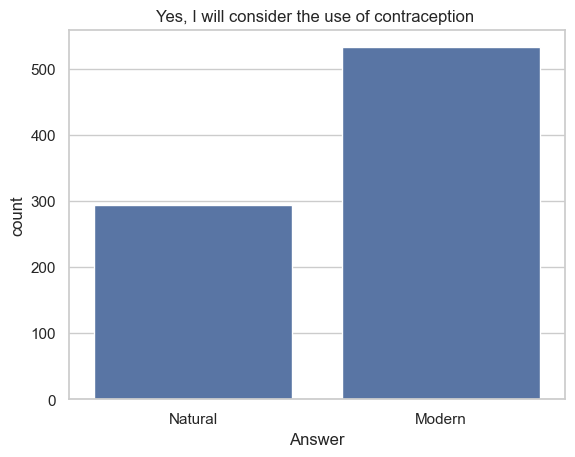

Natural - 294
Modern - 533


In [85]:
labels = ['Natural','Modern']
bins =[0,1,99]
temp['conversion3'] = pd.cut(cdata1['conversion3'], bins=bins, labels=labels, right=False)
sns.countplot(x='conversion3', data=temp)
plt.title(label='Yes, I will consider the use of contraception ')
plt.xlabel("Answer")
plt.show()

print("Natural - " + str (((temp['conversion3'] == 'Natural')).sum() ))
print("Modern - " + str (((temp['conversion3'] == 'Modern')).sum() ))
#cdata1['conversion3'] = temp['conversion3']


##### Age

In [86]:
(cdata1['age']>= 18  & (cdata1['age'] <= 29)).sum()
(cdata1['conversion3']  >= 1).sum()

533

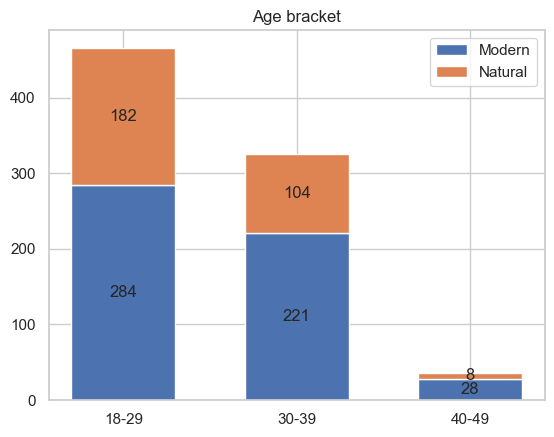

18-29 Modern - 284
30-39 Modern - 221
40-49 Modern - 28
18-29 Natural - 182
30-39 Natural - 104
40-49 Natural - 8


In [87]:
age_bins =[0,29,39,100]
age_labels = ['18-29','30-39','40-49']
new_age_labels = [0,1,2]
temp['age_bracket'] = pd.cut(cdata1['age'], bins=age_bins, labels=age_labels, right=False)
cdata1['age_bracket'] = pd.cut(cdata1['age'], bins=age_bins, labels=new_age_labels, right=False)

a = ((cdata1['age'] >= 18) & (cdata1['age'] <= 29) & (cdata1['conversion3']  >= 1) ).sum()
b = ((cdata1['age']>= 18) & (cdata1['age'] <= 29) & (cdata1['conversion3'] < 1) ).sum()
c = ((cdata1['age']>= 30) & (cdata1['age'] <= 39) & (cdata1['conversion3'] >= 1) ).sum()
d = ((cdata1['age'] >= 30) & (cdata1['age'] <= 39) & (cdata1['conversion3'] < 1) ).sum()
e = ((cdata1['age']>= 40) & (cdata1['age'] <= 49) & (cdata1['conversion3'] >= 1) ).sum()
f = ((cdata1['age'] >= 40) & (cdata1['age'] <= 49) & (cdata1['conversion3'] < 1) ).sum()

label1 = {
    'Modern' : np.array([a,c,e]),
    'Natural' : np.array([b,d,f])
}

fig, ax = plt.subplots()
bottom = np.zeros(3)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(age_labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('Age bracket')
ax.legend()

plt.show()

print("18-29 Modern - " + str (a))
print("30-39 Modern - " + str (c))
print("40-49 Modern - " + str (e))
print("18-29 Natural - " + str (b))
print("30-39 Natural - " + str (d))
print("40-49 Natural - " + str (f))


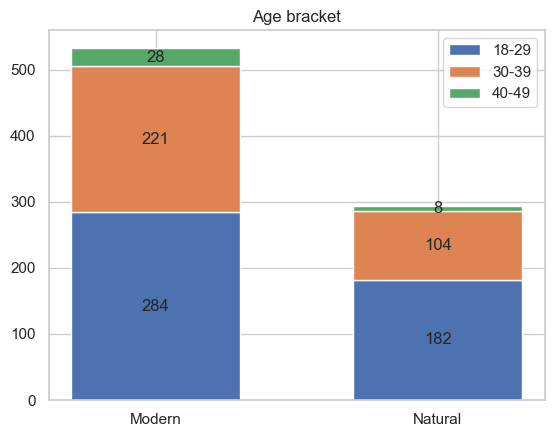

In [88]:
conv_label = ['Modern','Natural']
label1 = {
    '18-29' : np.array([a,b]),
    '30-39' : np.array([c,d]),
    '40-49' : np.array([e,f])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Age bracket')
ax.legend()

plt.show()

In [89]:
contingency_table = pd.crosstab(cdata1['age_bracket'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between the age bracket and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between the age bracket and conversion3.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3    0    1
age_bracket          
0            157  259
1            127  243
2             10   31

Chi-Square Statistic: 3.3422920704330847
P-Value: 0.18803145144644165
Degrees of Freedom: 2
Expected Frequencies:
 [[147.88875453 268.11124547]
 [131.5356711  238.4643289 ]
 [ 14.57557437  26.42442563]]

H0: There is no significant association between the age bracket and conversion
Fail to reject the null hypothesis: No significant association found.


##### Gender

male (Modern)- 163
female (Modern)- 370
male (Natural)- 125
female (Natural)- 169


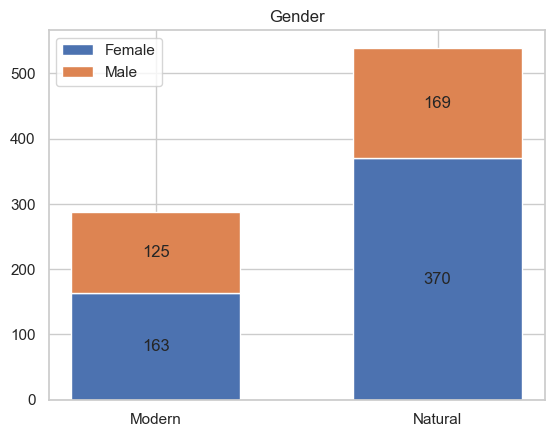

In [90]:
sex_labels = ['male','female']
sex_bins =[0,1,99]
temp['female'] = pd.cut(cdata1['female'], bins=sex_bins, labels=sex_labels, right=False)


a = ((cdata1['female'] == 0) & (cdata1['conversion3'] >= 1)).sum()  # male yes
b = ((cdata1['female'] == 1) & (cdata1['conversion3'] >= 1)).sum()  # female yes
c = ((cdata1['female'] == 0) & (cdata1['conversion3'] < 1)).sum()   # male no
d = ((cdata1['female'] == 1) & (cdata1['conversion3'] < 1)).sum()   # female no

conv_label = ['Modern','Natural']
label1 = {
    'Female' : np.array([a,b]),
    'Male' : np.array([c,d])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Gender')
ax.legend()

print("male (Modern)- " + str (a))
print("female (Modern)- " + str (b))
print("male (Natural)- " + str (c))
print("female (Natural)- " + str (d))


male (Modern)- 163
female (Modern)- 370
male (Natural)- 125
female (Natural)- 169


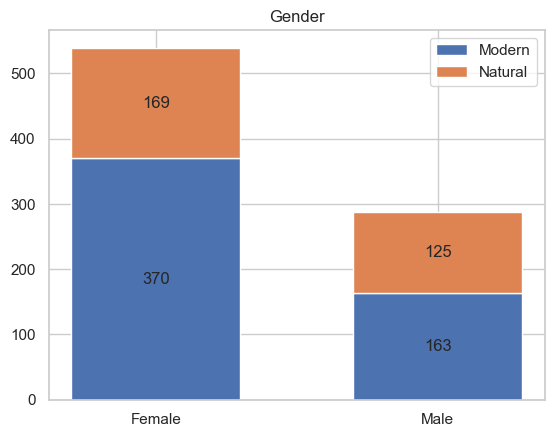

In [91]:
conv_label = ['Female','Male']
label1 = {
    'Modern' : np.array([b,a]),
    'Natural' : np.array([d,c])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Gender')
ax.legend()

print("male (Modern)- " + str (a))
print("female (Modern)- " + str (b))
print("male (Natural)- " + str (c))
print("female (Natural)- " + str (d))


In [92]:
contingency_table = pd.crosstab(cdata1['female'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between gender and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between gender and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3    0    1
female               
0            125  163
1            169  370

Chi-Square Statistic: 11.372432895045149
P-Value: 0.0007454217627251105
Degrees of Freedom: 1
Expected Frequencies:
 [[102.38452237 185.61547763]
 [191.61547763 347.38452237]]

H0: There is no significant association between gender and conversion
Reject the null hypothesis: There is a significant association between gender and conversion1.


##### Civil Status

Single Modern- 257
Married Modern- 265
Separated Modern- 9
Widowed Modern- 2
Single Natural- 150
Married Natural- 131
Separated Natural- 8
Widowed Natural- 5


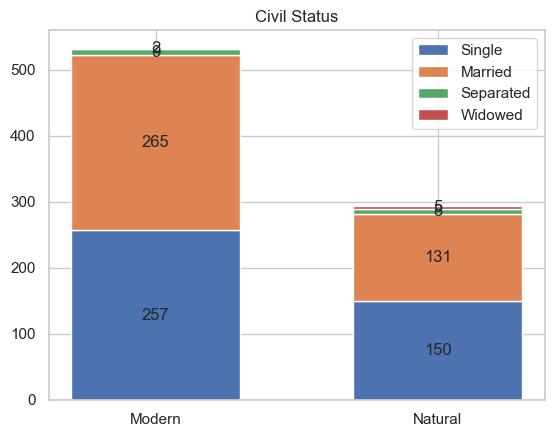

In [93]:
civil_labels = ['Single','Married','Separated','Widowed']
civil_bins =[1,2,3,4,99]
temp['civil'] = pd.cut(cdata1['civil'], bins=civil_bins, labels=civil_labels, right=False)

a = ((cdata1['civil'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # Single yes
b = ((cdata1['civil'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # Married yes
c = ((cdata1['civil'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # Separated yes
d = ((cdata1['civil'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # Widowed yes
e = ((cdata1['civil'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # Single No
f = ((cdata1['civil'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # Married No
g = ((cdata1['civil'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # Separated No
h = ((cdata1['civil'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # Widowed No



conv_label = ['Modern','Natural']
label1 = {
    'Single' : np.array([a,e]),
    'Married' : np.array([b,f]),
    'Separated' : np.array([c,g]),
    'Widowed' : np.array([d,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Civil Status')
ax.legend()

print("Single Modern- " + str (a))
print("Married Modern- " + str (b))
print("Separated Modern- " + str (c))
print("Widowed Modern- " + str (d))
print("Single Natural- " + str (e))
print("Married Natural- " + str (f))
print("Separated Natural- " + str (g))
print("Widowed Natural- " + str (h))


Single Modern- 257
Married Modern- 265
Separated Modern- 9
Widowed Modern- 2
Single Natural- 150
Married Natural- 131
Separated Natural- 8
Widowed Natural- 5


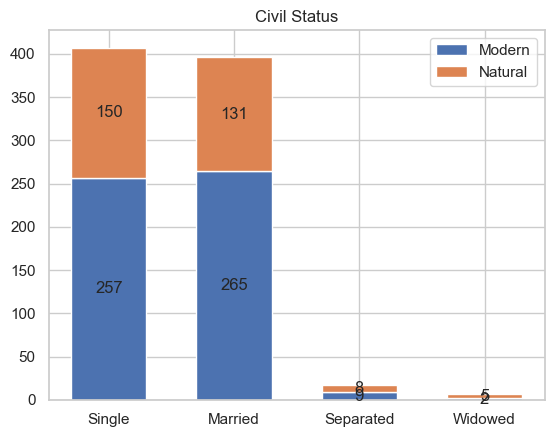

In [94]:
conv_label = ['Single','Married','Separated','Widowed']
label1 = {
    'Modern' : np.array([a,b,c,d]),
    'Natural' : np.array([e,f,g,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Civil Status')
ax.legend()

print("Single Modern- " + str (a))
print("Married Modern- " + str (b))
print("Separated Modern- " + str (c))
print("Widowed Modern- " + str (d))
print("Single Natural- " + str (e))
print("Married Natural- " + str (f))
print("Separated Natural- " + str (g))
print("Widowed Natural- " + str (h))


Single Modern- 257
Married Modern- 265
Single Natural- 150
Married Natural- 131


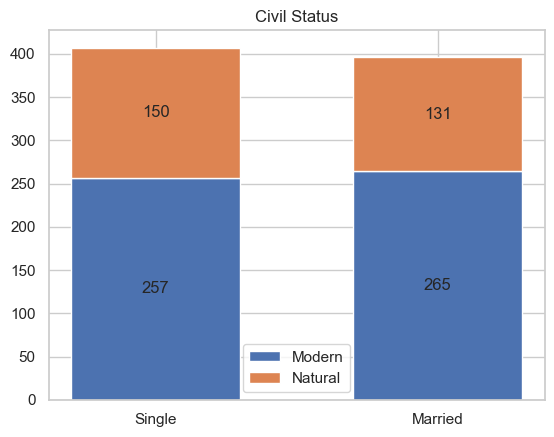

In [95]:
conv_label = ['Single','Married']
label1 = {
    'Modern' : np.array([a,b]),
    'Natural' : np.array([e,f])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Civil Status')
ax.legend()

print("Single Modern- " + str (a))
print("Married Modern- " + str (b))
print("Single Natural- " + str (e))
print("Married Natural- " + str (f))


In [96]:
contingency_table = pd.crosstab(cdata1['civil'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between civil status and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between civil status and conversion3.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")


Contingency Table:
 conversion3    0    1
civil                
1.0          150  257
2.0          131  265
3.0            8    9
4.0            5    2

Chi-Square Statistic: 6.27188089144213
P-Value: 0.0991063893682752
Degrees of Freedom: 3
Expected Frequencies:
 [[144.68923821 262.31076179]
 [140.77871826 255.22128174]
 [  6.04353083  10.95646917]
 [  2.4885127    4.5114873 ]]

H0: There is no significant association between civil status and conversion
Fail to reject the null hypothesis: No significant association found.


##### Job Type

Managerial Modern- 85
Rank-and-file Modern- 245
Self-employed Modern- 97
Student Modern- 54
Unemployed Modern- 52
Managerial Natural- 15
Rank-and-file Natural- 109
Self-employed Natural- 88
Student Natural- 26
Unemployed Natural- 56


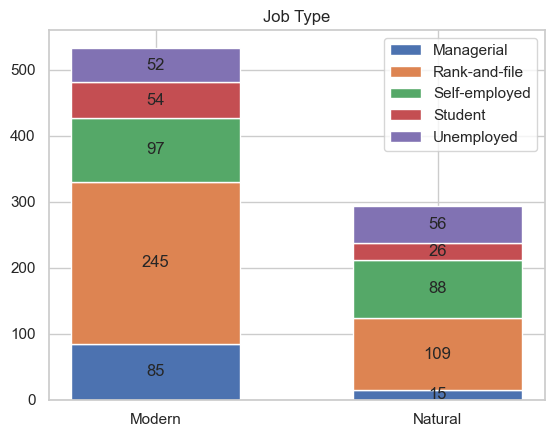

In [97]:
labels = ['Managerial','Rank-and-file','Self-employed',
          'Student','Unemployed']
bins =[1,2,3,4,5,99]
temp['job'] = pd.cut(cdata1['job'] , bins=bins, labels=labels, right=False)

a = ((cdata1['job'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # Managerial Modern
b = ((cdata1['job'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # Rank-and-file Modern
c = ((cdata1['job'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # Self-employed Modern
d = ((cdata1['job'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # Student Modern
e = ((cdata1['job'] == 5)  & (cdata1['conversion3'] >= 1) ).sum() # Unemployed Modern
f = ((cdata1['job'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # Managerial Natural
g = ((cdata1['job'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # Rank-and-file Natural
h = ((cdata1['job'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # Self-employed Natural
i = ((cdata1['job'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # Student Natural
j = ((cdata1['job'] == 5)  & (cdata1['conversion3'] < 1) ).sum() # Unemployed Natural



conv_label = ['Modern','Natural']
label1 = {
    'Managerial' : np.array([a,f]),
    'Rank-and-file' : np.array([b,g]),
    'Self-employed' : np.array([c,h]),
    'Student' : np.array([d,i]),
    'Unemployed' : np.array([e,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Job Type')
ax.legend()

print("Managerial Modern- " + str (a))
print("Rank-and-file Modern- " + str (b))
print("Self-employed Modern- " + str (c))
print("Student Modern- " + str (d))
print("Unemployed Modern- " + str (e))
print("Managerial Natural- " + str (f))
print("Rank-and-file Natural- " + str (g))
print("Self-employed Natural- " + str (h))
print("Student Natural- " + str (i))
print("Unemployed Natural- " + str (j))


Managerial Modern- 85
Rank-and-file Modern- 245
Self-employed Modern- 97
Student Modern- 54
Unemployed Modern- 52
Managerial Natural- 15
Rank-and-file Natural- 109
Self-employed Natural- 88
Student Natural- 26
Unemployed Natural- 56


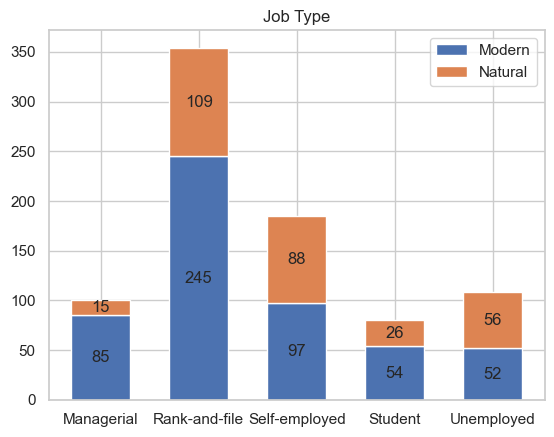

In [98]:
conv_label = labels
label1 = {
    'Modern' : np.array([a,b,c,d,e]),
    'Natural' : np.array([f,g,h,i,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(5)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Job Type')
ax.legend()

print("Managerial Modern- " + str (a))
print("Rank-and-file Modern- " + str (b))
print("Self-employed Modern- " + str (c))
print("Student Modern- " + str (d))
print("Unemployed Modern- " + str (e))
print("Managerial Natural- " + str (f))
print("Rank-and-file Natural- " + str (g))
print("Self-employed Natural- " + str (h))
print("Student Natural- " + str (i))
print("Unemployed Natural- " + str (j))

In [99]:
contingency_table = pd.crosstab(cdata1['job'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between job type and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between job type and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")


Contingency Table:
 conversion3    0    1
job                  
1             15   85
2            109  245
3             88   97
4             26   54
5             56   52

Chi-Square Statistic: 46.44333712715375
P-Value: 1.991413924161061e-09
Degrees of Freedom: 4
Expected Frequencies:
 [[ 35.55018138  64.44981862]
 [125.84764208 228.15235792]
 [ 65.76783555 119.23216445]
 [ 28.4401451   51.5598549 ]
 [ 38.39419589  69.60580411]]

H0: There is no significant association between job type and conversion
Reject the null hypothesis: There is a significant association between job type and conversion.


##### Educational Attainment

College grad Modern- 307
Post-grad Modern- 17
Voc Modern- 110
Elementary Modern- 3
High School Modern- 96
College grad Natural- 108
Post-grad Natural- 10
Voc Natural- 50
Elementary Natural- 20
High School Natural- 100


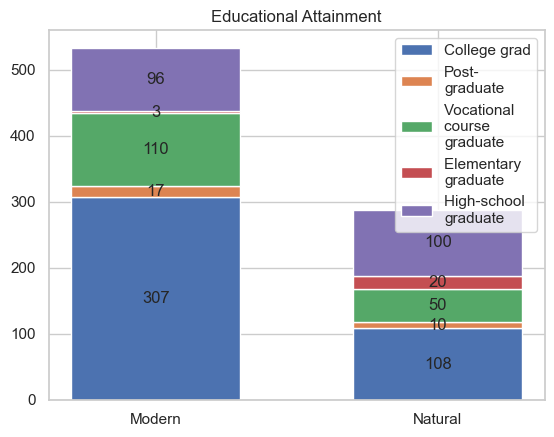

In [100]:
labels = ['College grad','Post-\ngraduate','Vocational \ncourse \ngraduate','Elementary \ngraduate','High-school \ngraduate']
bins =[1,2,3,4,5,6]
temp['educ'] = pd.cut(cdata1['educ'], bins=bins, labels=labels, right=False)

a = ((cdata1['educ'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # College Modern
b = ((cdata1['educ'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # Post-grad Modern
c = ((cdata1['educ'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # Voc Modern
d = ((cdata1['educ'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # Elem Modern
e = ((cdata1['educ'] == 5)  & (cdata1['conversion3'] >= 1) ).sum() # HS Modern
f = ((cdata1['educ'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # College Natural
g = ((cdata1['educ'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # Post-grad Natural
h = ((cdata1['educ'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # Voc Natural
i = ((cdata1['educ'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # Elem Natural
j = ((cdata1['educ'] == 5)  & (cdata1['conversion3'] < 1) ).sum() # HS Natural


conv_label = ['Modern','Natural']
label1 = {
    'College grad' : np.array([a,f]),
    'Post-\ngraduate' : np.array([b,g]),
    'Vocational \ncourse \ngraduate' : np.array([c,h]),
    'Elementary \ngraduate' : np.array([d,i]),
    'High-school \ngraduate' : np.array([e,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Educational Attainment')
ax.legend()

print("College grad Modern- " + str (a))
print("Post-grad Modern- " + str (b))
print("Voc Modern- " + str (c))
print("Elementary Modern- " + str (d))
print("High School Modern- " + str (e))
print("College grad Natural- " + str (f))
print("Post-grad Natural- " + str (g))
print("Voc Natural- " + str (h))
print("Elementary Natural- " + str (i))
print("High School Natural- " + str (j))



College grad Modern- 307
Post-grad Modern- 17
Voc Modern- 110
Elementary Modern- 3
High School Modern- 96
College grad Natural- 108
Post-grad Natural- 10
Voc Natural- 50
Elementary Natural- 20
High School Natural- 100


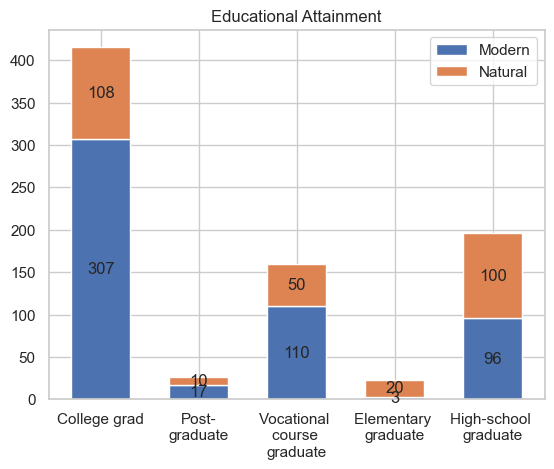

In [101]:
conv_label = labels
label1 = {
    'Modern' : np.array([a,b,c,d,e]),
    'Natural' : np.array([f,g,h,i,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(5)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Educational Attainment')
ax.legend()

print("College grad Modern- " + str (a))
print("Post-grad Modern- " + str (b))
print("Voc Modern- " + str (c))
print("Elementary Modern- " + str (d))
print("High School Modern- " + str (e))
print("College grad Natural- " + str (f))
print("Post-grad Natural- " + str (g))
print("Voc Natural- " + str (h))
print("Elementary Natural- " + str (i))
print("High School Natural- " + str (j))


In [102]:
contingency_table = pd.crosstab(cdata1['job'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between educational attainment and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between educational attainment and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3    0    1
job                  
1             15   85
2            109  245
3             88   97
4             26   54
5             56   52

Chi-Square Statistic: 46.44333712715375
P-Value: 1.991413924161061e-09
Degrees of Freedom: 4
Expected Frequencies:
 [[ 35.55018138  64.44981862]
 [125.84764208 228.15235792]
 [ 65.76783555 119.23216445]
 [ 28.4401451   51.5598549 ]
 [ 38.39419589  69.60580411]]

H0: There is no significant association between educational attainment and conversion
Reject the null hypothesis: There is a significant association between educational attainment and conversion1.


##### Gender Identification

Female Modern- 360
Male Modern- 153
LGBTQIA+ Modern- 18
Undisclosed Modern- 2
Female Natural- 167
Male Natural- 115
LGBTQIA+ Natural- 10
Undisclosed Natural- 2


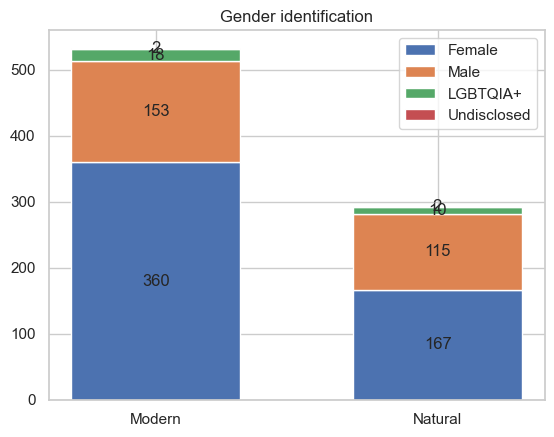

In [103]:
labels = ['Female','Male','LGBTQIA+','Undisclosed']
bins =[1,2,3,4,99]
temp['genderid'] = pd.cut(cdata1['genderid'], bins=bins, labels=labels, right=False)

a = ((cdata1['genderid'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # Female Modern
b = ((cdata1['genderid'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # Male Modern
c = ((cdata1['genderid'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # LGBTQIA+ Modern
d = ((cdata1['genderid'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # Undisclosed Modern
e = ((cdata1['genderid'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # Female Natural
f = ((cdata1['genderid'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # Male Natural
g = ((cdata1['genderid'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # LGBTQIA+ Natural
h = ((cdata1['genderid'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # Undisclosed Natural



conv_label = ['Modern','Natural']
label1 = {
    'Female' : np.array([a,e]),
    'Male' : np.array([b,f]),
    'LGBTQIA+' : np.array([c,g]),
    'Undisclosed' : np.array([d,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Gender identification')
ax.legend()

print("Female Modern- " + str (a))
print("Male Modern- " + str (b))
print("LGBTQIA+ Modern- " + str (c))
print("Undisclosed Modern- " + str (d))
print("Female Natural- " + str (e))
print("Male Natural- " + str (f))
print("LGBTQIA+ Natural- " + str (g))
print("Undisclosed Natural- " + str (h))


Female Modern- 360
Male Modern- 153
LGBTQIA+ Modern- 18
Undisclosed Modern- 2
Female Natural- 167
Male Natural- 115
LGBTQIA+ Natural- 10
Undisclosed Natural- 2


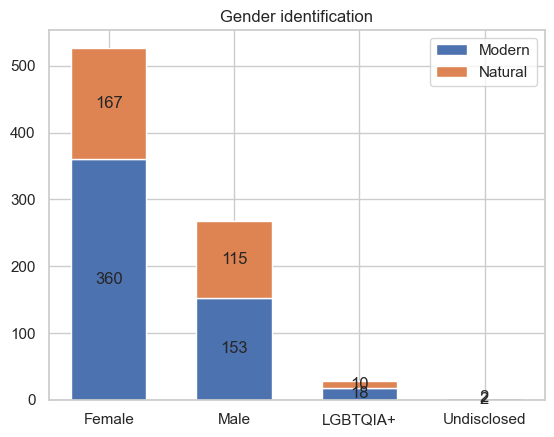

In [104]:
conv_label = ['Female','Male','LGBTQIA+','Undisclosed']
label1 = {
    'Modern' : np.array([a,b,c,d]),
    'Natural' : np.array([e,f,g,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Gender identification')
ax.legend()

print("Female Modern- " + str (a))
print("Male Modern- " + str (b))
print("LGBTQIA+ Modern- " + str (c))
print("Undisclosed Modern- " + str (d))
print("Female Natural- " + str (e))
print("Male Natural- " + str (f))
print("LGBTQIA+ Natural- " + str (g))
print("Undisclosed Natural- " + str (h))

In [105]:
contingency_table = pd.crosstab(cdata1['job'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between gender identification and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between gender identification and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3    0    1
job                  
1             15   85
2            109  245
3             88   97
4             26   54
5             56   52

Chi-Square Statistic: 46.44333712715375
P-Value: 1.991413924161061e-09
Degrees of Freedom: 4
Expected Frequencies:
 [[ 35.55018138  64.44981862]
 [125.84764208 228.15235792]
 [ 65.76783555 119.23216445]
 [ 28.4401451   51.5598549 ]
 [ 38.39419589  69.60580411]]

H0: There is no significant association between gender identification and conversion
Reject the null hypothesis: There is a significant association between gender identification and conversion.


##### Location

NCR Modern- 282
Luzon Modern- 110
Visayas Modern- 20
Mindanao Modern- 121
NCR Natural- 229
Luzon Natural- 49
Visayas Natural- 1
Mindanao Natural- 15


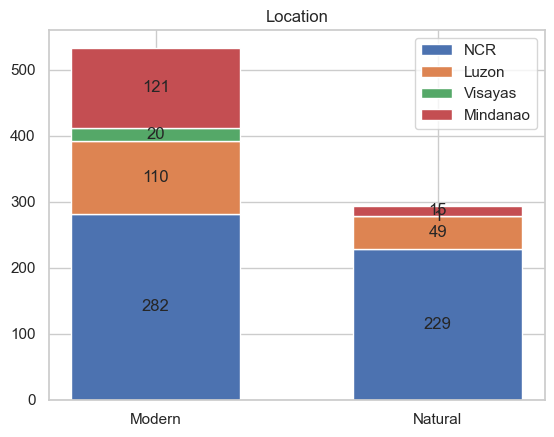

In [106]:

labels = ['NCR','Luzon','Visayas','Mindanao']
bins =[1,2,3,4,99]
temp['loc'] = pd.cut(cdata1['female'], bins=bins, labels=labels, right=False)

a = ((cdata1['loc'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # NCR Modern
b = ((cdata1['loc'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # Luzon Modern
c = ((cdata1['loc'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # Visayas Modern
d = ((cdata1['loc'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # Mindanao Modern
e = ((cdata1['loc'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # NCR Natural
f = ((cdata1['loc'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # Luzon Natural
g = ((cdata1['loc'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # Visayas Natural
h = ((cdata1['loc'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # Mindanao Natural



conv_label = ['Modern','Natural']
label1 = {
    'NCR' : np.array([a,e]),
    'Luzon' : np.array([b,f]),
    'Visayas' : np.array([c,g]),
    'Mindanao' : np.array([d,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Location')
ax.legend()

print("NCR Modern- " + str (a))
print("Luzon Modern- " + str (b))
print("Visayas Modern- " + str (c))
print("Mindanao Modern- " + str (d))
print("NCR Natural- " + str (e))
print("Luzon Natural- " + str (f))
print("Visayas Natural- " + str (g))
print("Mindanao Natural- " + str (h))



NCR Modern- 282
Luzon Modern- 110
Visayas Modern- 20
Mindanao Modern- 121
NCR Natural- 229
Luzon Natural- 49
Visayas Natural- 1
Mindanao Natural- 15


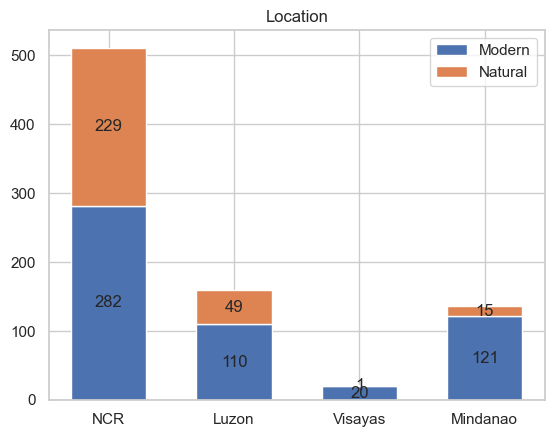

In [107]:
conv_label = ['NCR','Luzon','Visayas','Mindanao']
label1 = {
    'Modern' : np.array([a,b,c,d]),
    'Natural' : np.array([e,f,g,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Location')
ax.legend()

print("NCR Modern- " + str (a))
print("Luzon Modern- " + str (b))
print("Visayas Modern- " + str (c))
print("Mindanao Modern- " + str (d))
print("NCR Natural- " + str (e))
print("Luzon Natural- " + str (f))
print("Visayas Natural- " + str (g))
print("Mindanao Natural- " + str (h))


In [108]:
contingency_table = pd.crosstab(cdata1['loc'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between location and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between location and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3    0    1
loc                  
1            229  282
2             49  110
3              1   20
4             15  121

Chi-Square Statistic: 65.07234110365083
P-Value: 4.8404475577387627e-14
Degrees of Freedom: 3
Expected Frequencies:
 [[181.66142684 329.33857316]
 [ 56.52478839 102.47521161]
 [  7.46553809  13.53446191]
 [ 48.34824667  87.65175333]]

H0: There is no significant association between location and conversion
Reject the null hypothesis: There is a significant association between location and conversion1.


##### Results

In [109]:
temp['conversion3'] = label_encoder.fit_transform(cdata1['conversion3'])
temp['age_bracket'] = label_encoder.fit_transform(cdata1['age_bracket'])
temp['female'] = label_encoder.fit_transform(cdata1['female'])
temp['civil'] = label_encoder.fit_transform(cdata1['civil'])
temp['job'] = label_encoder.fit_transform(cdata1['job'])
temp['educ'] = label_encoder.fit_transform(cdata1['educ'])
temp['genderid'] = label_encoder.fit_transform(cdata1['genderid'])
temp['loc'] = label_encoder.fit_transform(cdata1['loc'])


X = temp[['age_bracket', 'female', 'civil', 'job','educ','genderid','loc']]
y = temp['conversion3']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\n\nDemographics vs Conversion 3:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.573081
         Iterations 6


Demographics vs Conversion 3:

                           Logit Regression Results                           
Dep. Variable:            conversion3   No. Observations:                  827
Model:                          Logit   Df Residuals:                      820
Method:                           MLE   Df Model:                            6
Date:                Fri, 31 Jan 2025   Pseudo R-squ.:                  0.1194
Time:                        15:44:32   Log-Likelihood:                -473.94
converged:                       True   LL-Null:                       -538.20
Covariance Type:            nonrobust   LLR p-value:                 2.628e-25
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age_bracket    -0.0231      0.131     -0.176      0.860      -0.280      

significant (p<0.05): 
* female (gender), 
* job (job type)
* educ (educational attainment)
* genderid (gender identification)
* loc (location) 

#### Other Features

##### Devices

Others (Modern)- 31
Smartphone (Modern)- 502
Others (Natural)- 31
Smartphone (Natural)- 263


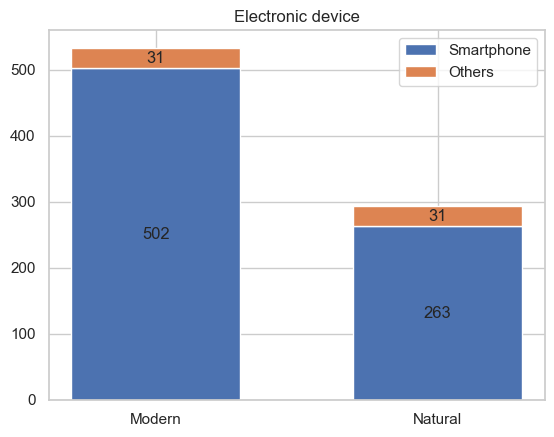

In [110]:
labels = ['Others','Smartphone']
bins =[0,1,99]
temp['device'] = pd.cut(cdata1['device'], bins=bins, labels=labels, right=False)


a = ((cdata1['device'] == 0) & (cdata1['conversion3'] >= 1)).sum()  # Others Modern
b = ((cdata1['device'] == 1) & (cdata1['conversion3'] >= 1)).sum()  # Smartphone Modern
c = ((cdata1['device'] == 0) & (cdata1['conversion3'] < 1)).sum()   # Others Natural
d = ((cdata1['device'] == 1) & (cdata1['conversion3'] < 1)).sum()   # Smartphone Natural

conv_label = ['Modern','Natural']
label1 = {
    'Smartphone' : np.array([b,d]),
    'Others' : np.array([a,c])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Electronic device')
ax.legend()

print("Others (Modern)- " + str (a))
print("Smartphone (Modern)- " + str (b))
print("Others (Natural)- " + str (c))
print("Smartphone (Natural)- " + str (d))

Others (Modern)- 31
Smartphone (Modern)- 502
Others (Natural)- 31
Smartphone (Natural)- 263


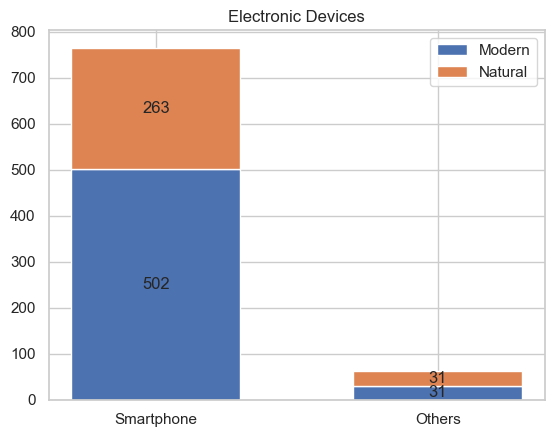

In [111]:

conv_label = ['Smartphone','Others']
label1 = {
    'Modern' : np.array([b,a]),
    'Natural' : np.array([d,c])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Electronic Devices')
ax.legend()


print("Others (Modern)- " + str (a))
print("Smartphone (Modern)- " + str (b))
print("Others (Natural)- " + str (c))
print("Smartphone (Natural)- " + str (d))

In [112]:
contingency_table = pd.crosstab(cdata1['device'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between devices used and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between devices used and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3    0    1
device               
0             31   31
1            263  502

Chi-Square Statistic: 5.44521920164974
P-Value: 0.01962195256846013
Degrees of Freedom: 1
Expected Frequencies:
 [[ 22.04111245  39.95888755]
 [271.95888755 493.04111245]]

H0: There is no significant association between devices used and conversion
Reject the null hypothesis: There is a significant association between devices used and conversion.


##### Purpose of Visit

recomendation Modern- 107
exploring Modern- 233
want to kNaturalw Modern- 131
attracted Modern- 62
recomendation Natural- 90
exploring Natural- 87
want to kNaturalw Natural- 42
attracted Natural- 75


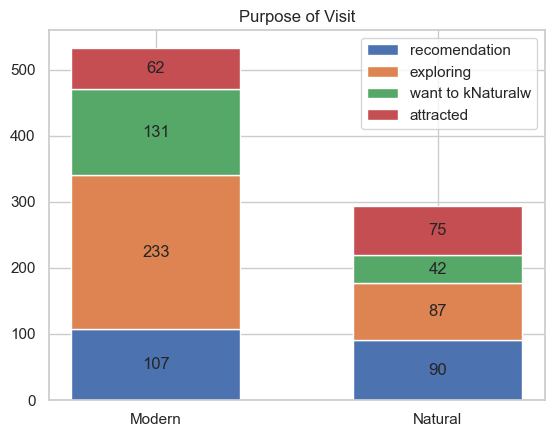

In [113]:
labels = ['A friend/relative recommended me to visit this page',
          'I am exploring using a Family Planning (FP) product or service and i want to kNaturalw what is right for me',
          'I want to kNaturalw the health facilities offering the Family Planning services near me',
          'I was visually attracted to the posted materials']
bins =[1,2,3,4,99]
temp['purpose'] = pd.cut(cdata1['purpose'], bins=bins, labels=labels, right=False)

a = ((cdata1['purpose'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # recomendation Modern
b = ((cdata1['purpose'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # exploring Modern
c = ((cdata1['purpose'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # want to kNaturalw Modern
d = ((cdata1['purpose'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # attracted Modern
e = ((cdata1['purpose'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # recomendation Natural
f = ((cdata1['purpose'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # exploring Natural
g = ((cdata1['purpose'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # want to kNaturalw Natural
h = ((cdata1['purpose'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # attracted Natural



conv_label = ['Modern','Natural']
label1 = {
    'recomendation' : np.array([a,e]),
    'exploring' : np.array([b,f]),
    'want to kNaturalw' : np.array([c,g]),
    'attracted' : np.array([d,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Purpose of Visit')
ax.legend()

print("recomendation Modern- " + str (a))
print("exploring Modern- " + str (b))
print("want to kNaturalw Modern- " + str (c))
print("attracted Modern- " + str (d))
print("recomendation Natural- " + str (e))
print("exploring Natural- " + str (f))
print("want to kNaturalw Natural- " + str (g))
print("attracted Natural- " + str (h))



recomendation Modern- 107
exploring Modern- 233
want to kNaturalw Modern- 131
attracted Modern- 62
recomendation Natural- 90
exploring Natural- 87
want to kNaturalw Natural- 42
attracted Natural- 75


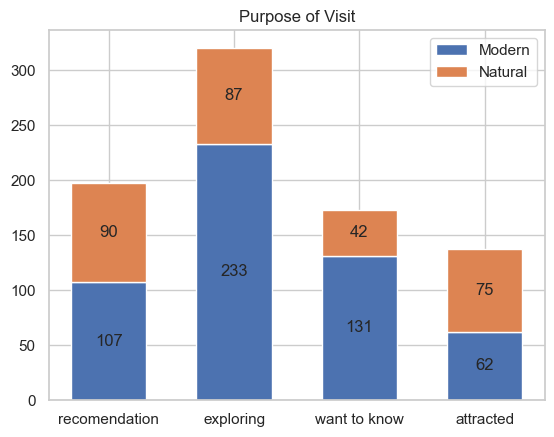

In [114]:
conv_label = ['recomendation','exploring', 'want to know','attracted']

label1 = {
    'Modern' : np.array([a,b,c,d]),
    'Natural' : np.array([e,f,g,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Purpose of Visit')
ax.legend()

print("recomendation Modern- " + str (a))
print("exploring Modern- " + str (b))
print("want to kNaturalw Modern- " + str (c))
print("attracted Modern- " + str (d))
print("recomendation Natural- " + str (e))
print("exploring Natural- " + str (f))
print("want to kNaturalw Natural- " + str (g))
print("attracted Natural- " + str (h))

In [115]:
contingency_table = pd.crosstab(cdata1['purpose'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between purpose of visit and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between purpose of visit and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3   0    1
purpose             
1            90  107
2            87  233
3            42  131
4            75   62

Chi-Square Statistic: 50.22370460215398
P-Value: 7.159095342491283e-11
Degrees of Freedom: 3
Expected Frequencies:
 [[ 70.03385732 126.96614268]
 [113.76058041 206.23941959]
 [ 61.50181378 111.49818622]
 [ 48.70374849  88.29625151]]

H0: There is no significant association between purpose of visit and conversion
Reject the null hypothesis: There is a significant association between purpose of visit and conversion.


##### Perceived RH needs

inform Modern- 305
explore Modern- 52
limit Modern- 59
practice Modern- 88
satisfy Modern- 29
inform Natural- 185
explore Natural- 41
limit Natural- 25
practice Natural- 35
satisfy Natural- 8


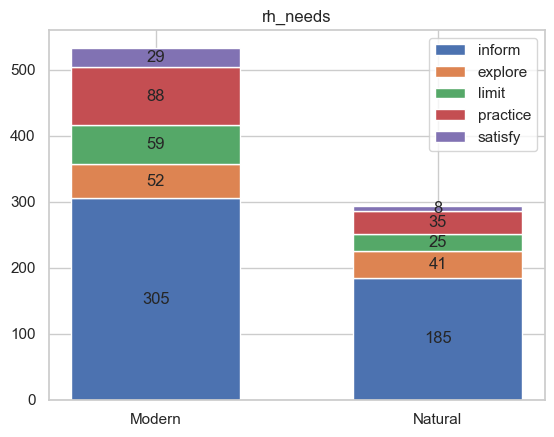

In [116]:
labels = ['I want to be informed about reproductive health and family planning',
          'I am exploring using a Family Planning (FP) product or service and i want to kNaturalw what is right for me',
          'I want to limit the number of children',
          'I want to practice safe sex without getting pregnant ',
          'I want to satisfy my partner’s needs']
bins =[1,2,3,4,5,6]
temp['rh_needs'] = pd.cut(cdata1['rh_needs'], bins=bins, labels=labels, right=False)

a = ((cdata1['rh_needs'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # inform Modern
b = ((cdata1['rh_needs'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # explore Modern
c = ((cdata1['rh_needs'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # limit Modern
d = ((cdata1['rh_needs'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # practice Modern
e = ((cdata1['rh_needs'] == 5)  & (cdata1['conversion3'] >= 1) ).sum() # satisfy Modern
f = ((cdata1['rh_needs'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # inform Natural
g = ((cdata1['rh_needs'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # explore Natural
h = ((cdata1['rh_needs'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # limit Natural
i = ((cdata1['rh_needs'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # practice Natural
j = ((cdata1['rh_needs'] == 5)  & (cdata1['conversion3'] < 1) ).sum() # satisfy Natural


conv_label = ['Modern','Natural']
label1 = {
    'inform' : np.array([a,f]),
    'explore' : np.array([b,g]),
    'limit' : np.array([c,h]),
    'practice' : np.array([d,i]),
    'satisfy' : np.array([e,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('rh_needs')
ax.legend()

print("inform Modern- " + str (a))
print("explore Modern- " + str (b))
print("limit Modern- " + str (c))
print("practice Modern- " + str (d))
print("satisfy Modern- " + str (e))
print("inform Natural- " + str (f))
print("explore Natural- " + str (g))
print("limit Natural- " + str (h))
print("practice Natural- " + str (i))
print("satisfy Natural- " + str (j))



inform Modern- 305
explore Modern- 52
limit Modern- 59
practice Modern- 88
satisfy Modern- 29
inform Natural- 185
explore Natural- 41
limit Natural- 25
practice Natural- 35
satisfy Natural- 8


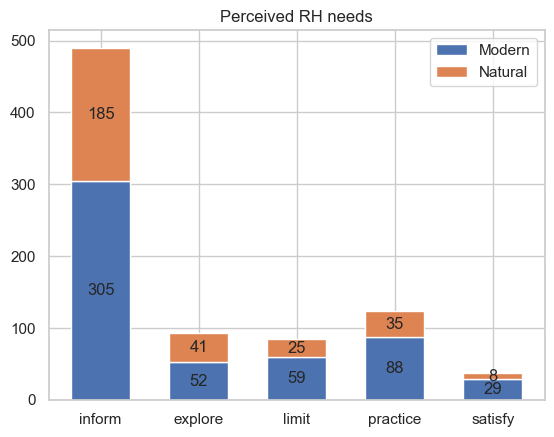

In [117]:
conv_label = ['inform','explore','limit','practice','satisfy']
label1 = {
    'Modern' : np.array([a,b,c,d,e]),
    'Natural' : np.array([f,g,h,i,j])
}


fig, ax = plt.subplots()
bottom = np.zeros(5)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Perceived RH needs')
ax.legend()

print("inform Modern- " + str (a))
print("explore Modern- " + str (b))
print("limit Modern- " + str (c))
print("practice Modern- " + str (d))
print("satisfy Modern- " + str (e))
print("inform Natural- " + str (f))
print("explore Natural- " + str (g))
print("limit Natural- " + str (h))
print("practice Natural- " + str (i))
print("satisfy Natural- " + str (j))


In [118]:
contingency_table = pd.crosstab(cdata1['rh_needs'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between Perceived RH needs and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between Perceived RH needs and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3    0    1
rh_needs             
1            185  305
2             41   52
3             25   59
4             35   88
5              8   29

Chi-Square Statistic: 11.060696670165251
P-Value: 0.025890270184587227
Degrees of Freedom: 4
Expected Frequencies:
 [[174.19588875 315.80411125]
 [ 33.06166868  59.93833132]
 [ 29.86215236  54.13784764]
 [ 43.7267231   79.2732769 ]
 [ 13.15356711  23.84643289]]

H0: There is no significant association between Perceived RH needs and conversion
Reject the null hypothesis: There is a significant association between Perceived RH needs and conversion.


##### No. of Benefits of using FP

1 Modern- 161
2 Modern- 113
3 Modern- 57
4 Modern- 22
5 Modern- 180
1 Natural- 176
2 Natural- 42
3 Natural- 17
4 Natural- 11
5 Natural- 48


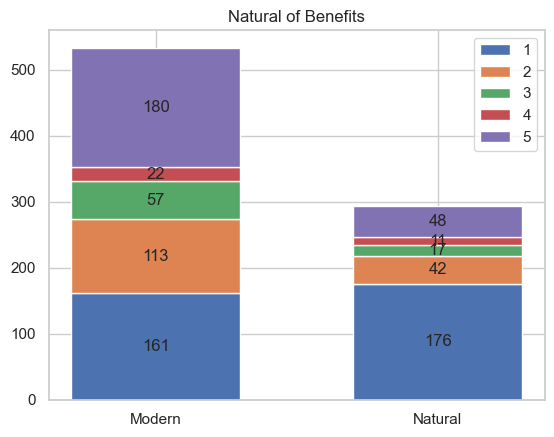

In [119]:
a = ((cdata1['benefit'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # 1 Modern
b = ((cdata1['benefit'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # 2 Modern
c = ((cdata1['benefit'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # 3 Modern
d = ((cdata1['benefit'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # 4 Modern
e = ((cdata1['benefit'] == 5)  & (cdata1['conversion3'] >= 1) ).sum() # 5 Modern
f = ((cdata1['benefit'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # 1 Natural
g = ((cdata1['benefit'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # 2 Natural
h = ((cdata1['benefit'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # 3 Natural
i = ((cdata1['benefit'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # 4 Natural
j = ((cdata1['benefit'] == 5)  & (cdata1['conversion3'] < 1) ).sum() # 5 Natural


conv_label = ['Modern','Natural']
label1 = {
    '1' : np.array([a,f]),
    '2' : np.array([b,g]),
    '3' : np.array([c,h]),
    '4' : np.array([d,i]),
    '5' : np.array([e,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Natural of Benefits')
ax.legend()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("5 Modern- " + str (e))
print("1 Natural- " + str (f))
print("2 Natural- " + str (g))
print("3 Natural- " + str (h))
print("4 Natural- " + str (i))
print("5 Natural- " + str (j))

1 Modern- 161
2 Modern- 113
3 Modern- 57
4 Modern- 22
5 Modern- 180
1 Natural- 176
2 Natural- 42
3 Natural- 17
4 Natural- 11
5 Natural- 48


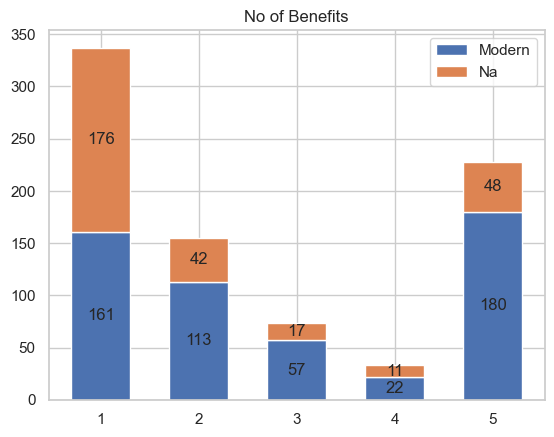

In [120]:
conv_label = ['1','2','3','4','5']
label1 = {
    'Modern' : np.array([a,b,c,d,e]),
    'Na' : np.array([f,g,h,i,j])
}


fig, ax = plt.subplots()
bottom = np.zeros(5)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('No of Benefits')
ax.legend()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("5 Modern- " + str (e))
print("1 Natural- " + str (f))
print("2 Natural- " + str (g))
print("3 Natural- " + str (h))
print("4 Natural- " + str (i))
print("5 Natural- " + str (j))

In [121]:
contingency_table = pd.crosstab(cdata1['benefit'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between No of FP benefits and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between No of FP benefits and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3    0    1
benefit              
1            176  161
2             42  113
3             17   57
4             11   22
5             48  180

Chi-Square Statistic: 71.82848023374154
P-Value: 9.329054459963111e-15
Degrees of Freedom: 4
Expected Frequencies:
 [[119.80411125 217.19588875]
 [ 55.10278114  99.89721886]
 [ 26.30713422  47.69286578]
 [ 11.73155985  21.26844015]
 [ 81.05441354 146.94558646]]

H0: There is no significant association between No of FP benefits and conversion
Reject the null hypothesis: There is a significant association between No of FP benefits and conversion.


##### No. of platforms visited

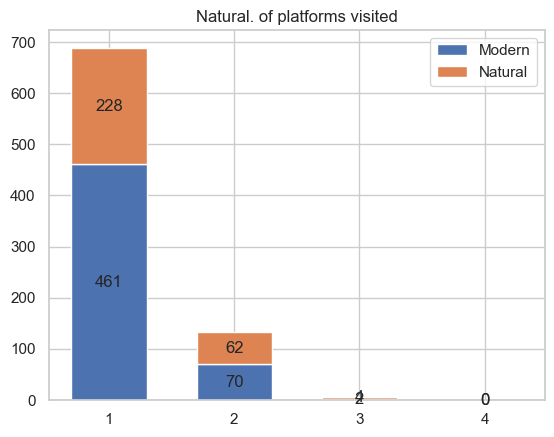

1 Modern- 461
2 Modern- 70
3 Modern- 2
4 Modern- 0
1 Natural- 228
2 Natural- 62
3 Natural- 4
4 Natural- 0


In [122]:
a = ((cdata1['platforms'] == 1 )  & (cdata1['conversion3'] >= 1) ).sum() # 1 Modern
b = ((cdata1['platforms'] == 2 )  & (cdata1['conversion3'] >= 1) ).sum() # 2 Modern
c = ((cdata1['platforms'] == 3 )  & (cdata1['conversion3'] >= 1) ).sum() # 3 Modern
d = ((cdata1['platforms'] == 4 )  & (cdata1['conversion3'] >= 1) ).sum() # 4 Modern
e = ((cdata1['platforms'] == 1 )  & (cdata1['conversion3'] < 1) ).sum() # 1 Natural
f = ((cdata1['platforms'] == 2 )  & (cdata1['conversion3'] < 1) ).sum() # 2 Natural
g = ((cdata1['platforms'] == 3 )  & (cdata1['conversion3'] < 1) ).sum() # 3 Natural
h = ((cdata1['platforms'] == 4 )  & (cdata1['conversion3'] < 1) ).sum() # 4 nbo

labels = ['1','2','3','4']

label1 = {
    'Modern' : np.array([a,b,c,d]),
    'Natural' : np.array([e,f,g,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('Natural. of platforms visited')
ax.legend()

plt.show()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("1 Natural- " + str (e))
print("2 Natural- " + str (f))
print("3 Natural- " + str (g))
print("4 Natural- " + str (h))


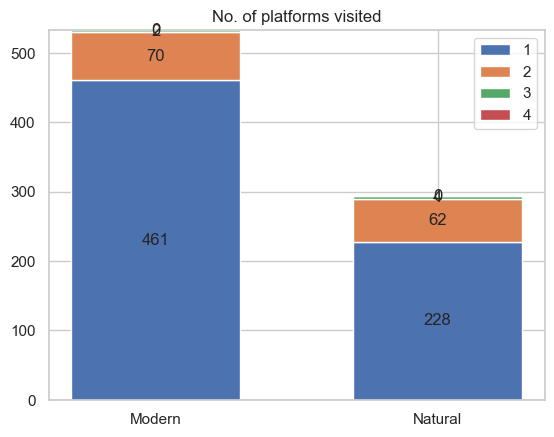

1 Modern- 461
2 Modern- 70
3 Modern- 2
4 Modern- 0
1 Natural- 228
2 Natural- 62
3 Natural- 4
4 Natural- 0


In [123]:
labels = ['Modern','Natural']

label1 = {
    '1' : np.array([a,e]),
    '2' : np.array([b,f]),
    '3' : np.array([c,g]),
    '4' : np.array([d,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('No. of platforms visited')
ax.legend()

plt.show()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("1 Natural- " + str (e))
print("2 Natural- " + str (f))
print("3 Natural- " + str (g))
print("4 Natural- " + str (h))

In [124]:
contingency_table = pd.crosstab(cdata1['platforms'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between No of platforms visited and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between No of platforms visited and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3    0    1
platforms            
1            228  461
2             62   70
3              4    2

Chi-Square Statistic: 11.866350968425374
P-Value: 0.0026500534106822338
Degrees of Freedom: 2
Expected Frequencies:
 [[244.9407497  444.0592503 ]
 [ 46.92623942  85.07376058]
 [  2.13301088   3.86698912]]

H0: There is no significant association between No of platforms visited and conversion
Reject the null hypothesis: There is a significant association between No of platforms visited and conversion.


##### Frequency of Visit to page

1 Modern- 44
2 Modern- 132
3 Modern- 187
4 Modern- 117
5 Modern- 53
1 Natural- 43
2 Natural- 133
3 Natural- 41
4 Natural- 38
5 Natural- 39


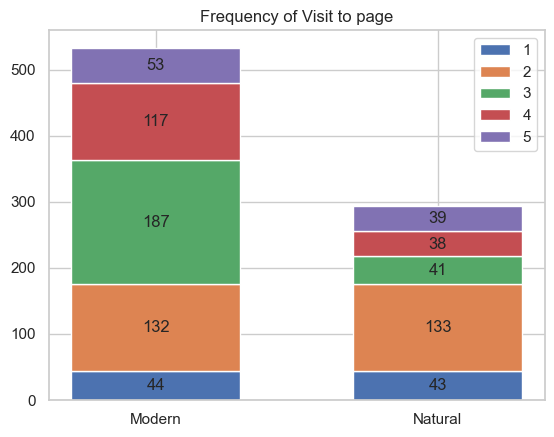

In [125]:
a = ((cdata1['oftenvisit'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # 1 Modern
b = ((cdata1['oftenvisit'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # 2 Modern
c = ((cdata1['oftenvisit'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # 3 Modern
d = ((cdata1['oftenvisit'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # 4 Modern
e = ((cdata1['oftenvisit'] == 5)  & (cdata1['conversion3'] >= 1) ).sum() # 5 Modern
f = ((cdata1['oftenvisit'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # 1 Natural
g = ((cdata1['oftenvisit'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # 2 Natural
h = ((cdata1['oftenvisit'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # 3 Natural
i = ((cdata1['oftenvisit'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # 4 Natural
j = ((cdata1['oftenvisit'] == 5)  & (cdata1['conversion3'] < 1) ).sum() # 5 Natural


conv_label = ['Modern','Natural']
label1 = {
    '1' : np.array([a,f]),
    '2' : np.array([b,g]),
    '3' : np.array([c,h]),
    '4' : np.array([d,i]),
    '5' : np.array([e,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Frequency of Visit to page')
ax.legend()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("5 Modern- " + str (e))
print("1 Natural- " + str (f))
print("2 Natural- " + str (g))
print("3 Natural- " + str (h))
print("4 Natural- " + str (i))
print("5 Natural- " + str (j))

1 Modern- 44
2 Modern- 132
3 Modern- 187
4 Modern- 117
5 Modern- 53
1 Natural- 43
2 Natural- 133
3 Natural- 41
4 Natural- 38
5 Natural- 39


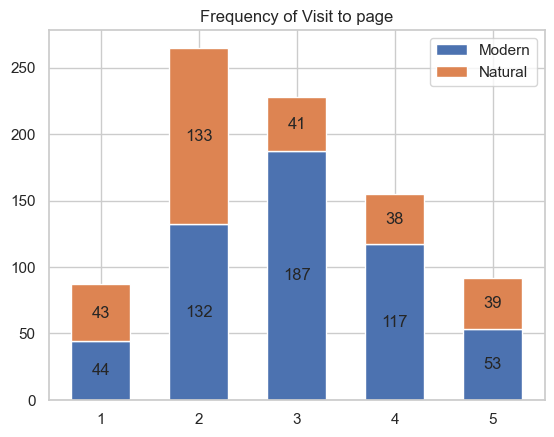

In [126]:
conv_label = ['1','2','3','4','5']


label1 = {
    'Modern' : np.array([a,b,c,d,e]),
    'Natural' : np.array([f,g,h,i,j])
}

fig, ax = plt.subplots()
bottom = np.zeros(5)
width = 0.6

for label_, count_ in label1.items():
    p = ax.bar(conv_label, count_, width, label=label_, bottom=bottom)
    bottom += count_

    ax.bar_label(p, label_type='center')

ax.set_title('Frequency of Visit to page')
ax.legend()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("5 Modern- " + str (e))
print("1 Natural- " + str (f))
print("2 Natural- " + str (g))
print("3 Natural- " + str (h))
print("4 Natural- " + str (i))
print("5 Natural- " + str (j))

In [127]:
contingency_table = pd.crosstab(cdata1['oftenvisit'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between Frequency of Visit and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between Frequency of Visit and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3    0    1
oftenvisit           
1             43   44
2            133  132
3             41  187
4             38  117
5             39   53

Chi-Square Statistic: 72.92165004575436
P-Value: 5.480778171128595e-15
Degrees of Freedom: 4
Expected Frequencies:
 [[ 30.9286578   56.0713422 ]
 [ 94.20798065 170.79201935]
 [ 81.05441354 146.94558646]
 [ 55.10278114  99.89721886]
 [ 32.70616687  59.29383313]]

H0: There is no significant association between Frequency of Visit and conversion
Reject the null hypothesis: There is a significant association between Frequency of Visit and conversion.


##### How did you learn about FP pages? 

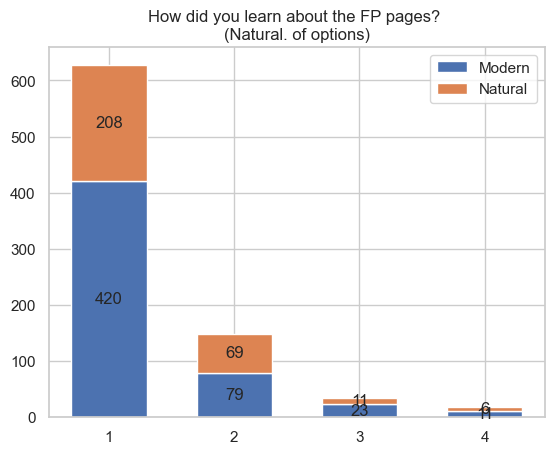

1 Modern- 420
2 Modern- 79
3 Modern- 23
4 Modern- 11
1 Natural- 208
2 Natural- 69
3 Natural- 11
4 Natural- 6


In [128]:
a = ((cdata1['learnpage'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # 1 Modern
b = ((cdata1['learnpage'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # 2 Modern
c = ((cdata1['learnpage'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # 3 Modern
d = ((cdata1['learnpage'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # 4 Modern
e = ((cdata1['learnpage'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # 1 Natural
f = ((cdata1['learnpage'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # 2 Natural
g = ((cdata1['learnpage'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # 3 Natural
h = ((cdata1['learnpage'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # 4 Natural

labels = ['1','2','3','4']

label1 = {
    'Modern' : np.array([a,b,c,d]),
    'Natural' : np.array([e,f,g,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(4)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('How did you learn about the FP pages? \n(Natural. of options)')
ax.legend()

plt.show()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("1 Natural- " + str (e))
print("2 Natural- " + str (f))
print("3 Natural- " + str (g))
print("4 Natural- " + str (h))


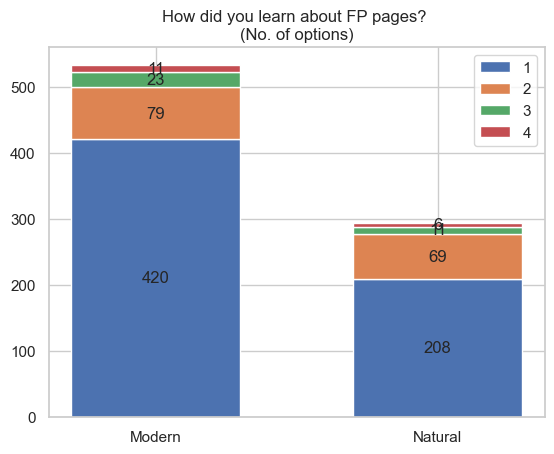

1 Modern- 420
2 Modern- 79
3 Modern- 23
4 Modern- 11
1 Natural- 208
2 Natural- 69
3 Natural- 11
4 Natural- 6


In [129]:
labels = ['Modern','Natural']

label1 = {
    '1' : np.array([a,e]),
    '2' : np.array([b,f]),
    '3' : np.array([c,g]),
    '4' : np.array([d,h])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('How did you learn about FP pages? \n(No. of options)')
ax.legend()

plt.show()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("1 Natural- " + str (e))
print("2 Natural- " + str (f))
print("3 Natural- " + str (g))
print("4 Natural- " + str (h))

In [130]:
contingency_table = pd.crosstab(cdata1['learnpage'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between how did you learn about FB pages and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between how did you learn about FB pages and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3    0    1
learnpage            
1            208  420
2             69   79
3             11   23
4              6   11

Chi-Square Statistic: 9.687383657318012
P-Value: 0.021419241310098945
Degrees of Freedom: 3
Expected Frequencies:
 [[223.25513906 404.74486094]
 [ 52.61426844  95.38573156]
 [ 12.08706167  21.91293833]
 [  6.04353083  10.95646917]]

H0: There is no significant association between how did you learn about FB pages and conversion
Reject the null hypothesis: There is a significant association between how did you learn about FB pages and conversion.


##### What type of post were you able to like in terms of contents? (multiple entries)

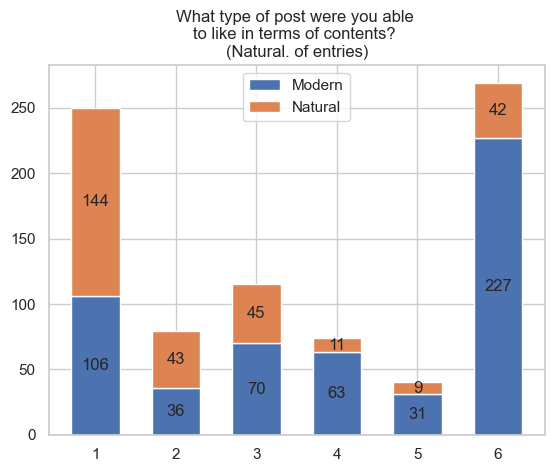

1 Modern- 106
2 Modern- 36
3 Modern- 70
4 Modern- 63
5 Modern- 31
6 Modern- 227
1 Natural- 144
2 Natural- 43
3 Natural- 45
4 Natural- 11
5 Natural- 9
6 Natural- 42


In [131]:
a = ((cdata1['contents'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # 1 Modern
b = ((cdata1['contents'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # 2 Modern
c = ((cdata1['contents'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # 3 Modern
d = ((cdata1['contents'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # 4 Modern
e = ((cdata1['contents'] == 5)  & (cdata1['conversion3'] >= 1) ).sum() # 5 Modern
f = ((cdata1['contents'] == 6)  & (cdata1['conversion3'] >= 1) ).sum() # 6 Modern
g = ((cdata1['contents'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # 1 Natural
h = ((cdata1['contents'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # 2 Natural
i = ((cdata1['contents'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # 3 Natural
j = ((cdata1['contents'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # 4 Natural
k = ((cdata1['contents'] == 5)  & (cdata1['conversion3'] < 1) ).sum() # 5 Natural
l = ((cdata1['contents'] == 6)  & (cdata1['conversion3'] < 1) ).sum() # 6 Natural

labels = ['1','2','3','4','5','6']

label1 = {
    'Modern' : np.array([a,b,c,d,e,f]),
    'Natural' : np.array([g,h,i,j,k,l])
}

fig, ax = plt.subplots()
bottom = np.zeros(6)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('What type of post were you able \nto like in terms of contents? \n(Natural. of entries)')
ax.legend()

plt.show()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("5 Modern- " + str (e))
print("6 Modern- " + str (f))
print("1 Natural- " + str (g))
print("2 Natural- " + str (h))
print("3 Natural- " + str (i))
print("4 Natural- " + str (j))
print("5 Natural- " + str (k))
print("6 Natural- " + str (l))

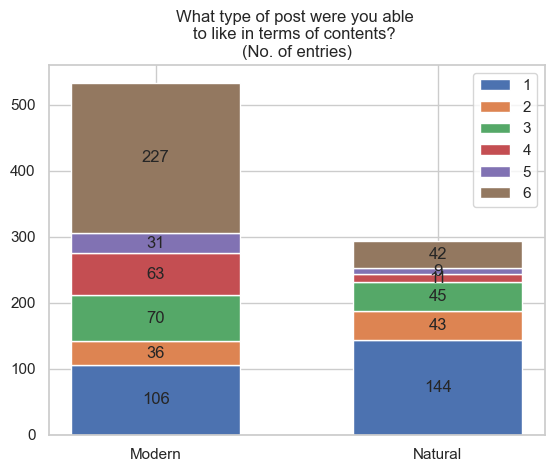

1 Modern- 106
2 Modern- 36
3 Modern- 70
4 Modern- 63
5 Modern- 31
6 Modern- 227
1 Natural- 144
2 Natural- 43
3 Natural- 45
4 Natural- 11
5 Natural- 9
6 Natural- 42


In [132]:
labels = ['Modern','Natural']

label1 = {
    '1' : np.array([a,g]),
    '2' : np.array([b,h]),
    '3' : np.array([c,i]),
    '4' : np.array([d,j]),
    '5' : np.array([e,k]),
    '6' : np.array([f,l])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('What type of post were you able \nto like in terms of contents? \n(No. of entries)')
ax.legend()

plt.show()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("5 Modern- " + str (e))
print("6 Modern- " + str (f))
print("1 Natural- " + str (g))
print("2 Natural- " + str (h))
print("3 Natural- " + str (i))
print("4 Natural- " + str (j))
print("5 Natural- " + str (k))
print("6 Natural- " + str (l))

In [133]:
contingency_table = pd.crosstab(cdata1['contents'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between no of visuals contents and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between no of visuals contents and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3    0    1
contents             
1            144  106
2             43   36
3             45   70
4             11   63
5              9   31
6             42  227

Chi-Square Statistic: 129.44285157500352
P-Value: 3.124666720098021e-26
Degrees of Freedom: 5
Expected Frequencies:
 [[ 88.87545345 161.12454655]
 [ 28.08464329  50.91535671]
 [ 40.88270859  74.11729141]
 [ 26.30713422  47.69286578]
 [ 14.22007255  25.77992745]
 [ 95.62998791 173.37001209]]

H0: There is no significant association between no of visuals contents and conversion
Reject the null hypothesis: There is a significant association between no of visuals contents and conversion.


##### What type of post were you able to like in terms of visuals/audio? (multiple entries)

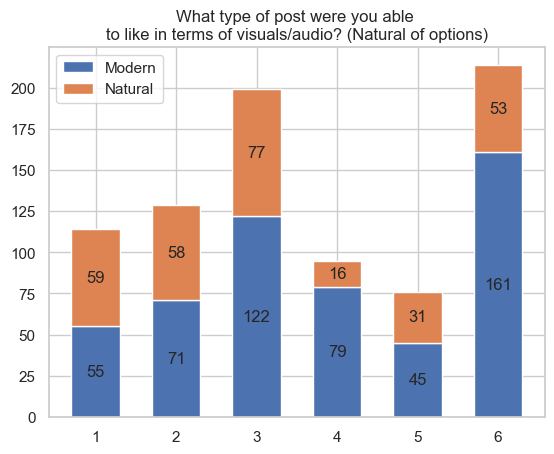

1 Modern- 55
2 Modern- 71
3 Modern- 122
4 Modern- 79
5 Modern- 45
6 Modern- 161
1 Natural- 59
2 Natural- 58
3 Natural- 77
4 Natural- 16
5 Natural- 31
6 Natural- 53


In [134]:
a = ((cdata1['visuals'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # 1 Modern
b = ((cdata1['visuals'] == 2)  & (cdata1['conversion3'] >= 1) ).sum() # 2 Modern
c = ((cdata1['visuals'] == 3)  & (cdata1['conversion3'] >= 1) ).sum() # 3 Modern
d = ((cdata1['visuals'] == 4)  & (cdata1['conversion3'] >= 1) ).sum() # 4 Modern
e = ((cdata1['visuals'] == 5)  & (cdata1['conversion3'] >= 1) ).sum() # 5 Modern
f = ((cdata1['visuals'] == 6)  & (cdata1['conversion3'] >= 1) ).sum() # 6 Modern
g = ((cdata1['visuals'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # 1 Natural
h = ((cdata1['visuals'] == 2)  & (cdata1['conversion3'] < 1) ).sum() # 2 Natural
i = ((cdata1['visuals'] == 3)  & (cdata1['conversion3'] < 1) ).sum() # 3 Natural
j = ((cdata1['visuals'] == 4)  & (cdata1['conversion3'] < 1) ).sum() # 4 Natural
k = ((cdata1['visuals'] == 5)  & (cdata1['conversion3'] < 1) ).sum() # 5 Natural
l = ((cdata1['visuals'] == 6)  & (cdata1['conversion3'] < 1) ).sum() # 6 Natural

labels = ['1','2','3','4','5','6']

label1 = {
    'Modern' : np.array([a,b,c,d,e,f]),
    'Natural' : np.array([g,h,i,j,k,l])
}

fig, ax = plt.subplots()
bottom = np.zeros(6)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('What type of post were you able \nto like in terms of visuals/audio? (Natural of options)')
ax.legend()

plt.show()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("5 Modern- " + str (e))
print("6 Modern- " + str (f))
print("1 Natural- " + str (g))
print("2 Natural- " + str (h))
print("3 Natural- " + str (i))
print("4 Natural- " + str (j))
print("5 Natural- " + str (k))
print("6 Natural- " + str (l))

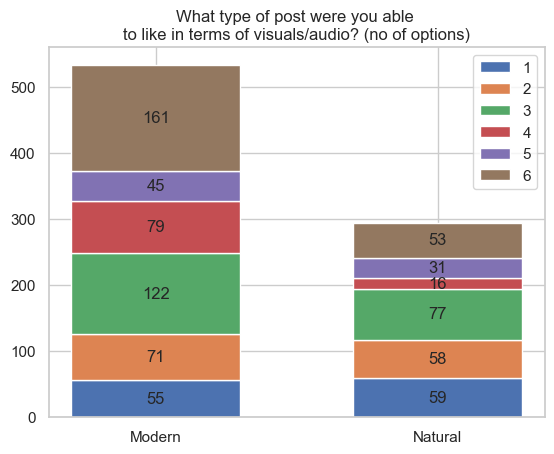

1 Modern- 55
2 Modern- 71
3 Modern- 122
4 Modern- 79
5 Modern- 45
6 Modern- 161
1 Natural- 59
2 Natural- 58
3 Natural- 77
4 Natural- 16
5 Natural- 31
6 Natural- 53


In [135]:
labels = ['Modern','Natural']

label1 = {
    '1' : np.array([a,g]),
    '2' : np.array([b,h]),
    '3' : np.array([c,i]),
    '4' : np.array([d,j]),
    '5' : np.array([e,k]),
    '6' : np.array([f,l])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('What type of post were you able \nto like in terms of visuals/audio? (no of options)')
ax.legend()

plt.show()

print("1 Modern- " + str (a))
print("2 Modern- " + str (b))
print("3 Modern- " + str (c))
print("4 Modern- " + str (d))
print("5 Modern- " + str (e))
print("6 Modern- " + str (f))
print("1 Natural- " + str (g))
print("2 Natural- " + str (h))
print("3 Natural- " + str (i))
print("4 Natural- " + str (j))
print("5 Natural- " + str (k))
print("6 Natural- " + str (l))

In [136]:
contingency_table = pd.crosstab(cdata1['visuals'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between no of visuals types and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between no of visuals types and conversion.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3   0    1
visuals             
1            59   55
2            58   71
3            77  122
4            16   79
5            31   45
6            53  161

Chi-Square Statistic: 45.193231551480494
P-Value: 1.3253829366514759e-08
Degrees of Freedom: 5
Expected Frequencies:
 [[ 40.52720677  73.47279323]
 [ 45.85973398  83.14026602]
 [ 70.74486094 128.25513906]
 [ 33.77267231  61.22732769]
 [ 27.01813785  48.98186215]
 [ 76.07738815 137.92261185]]

H0: There is no significant association between no of visuals types and conversion
Reject the null hypothesis: There is a significant association between no of visuals types and conversion.


##### Visit Social Media 
In the past three months, were you able to visit other social media sites/pages related to Family Planning and Reproductive Health? 

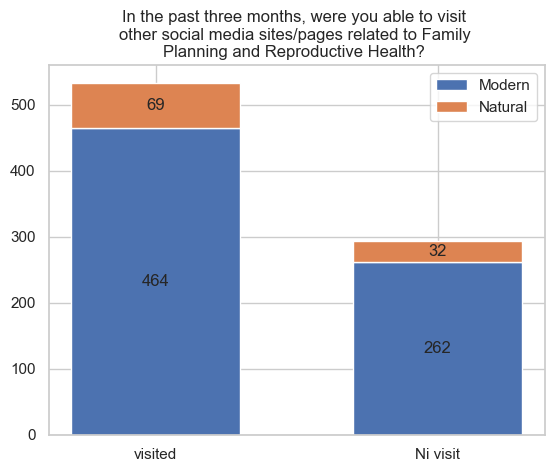

Visited Modern- 464
No Visit Modern- 69
Visited Natural- 262
No Visit Natural- 32


In [137]:
a = ((cdata1['social'] == 1)  & (cdata1['conversion3'] >= 1) ).sum() # visited Modern
b = ((cdata1['social'] == 0)  & (cdata1['conversion3'] >= 1) ).sum() # No visit Modern
c = ((cdata1['social'] == 1)  & (cdata1['conversion3'] < 1) ).sum() # visited Natural
d = ((cdata1['social'] == 0)  & (cdata1['conversion3'] < 1) ).sum() # No visit Modern


labels = ['visited','Ni visit']

label1 = {
    'Modern' : np.array([a,c]),
    'Natural' : np.array([b,d])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('In the past three months, were you able to visit \nother social media sites/pages related to Family \nPlanning and Reproductive Health? ')
ax.legend()

plt.show()

print("Visited Modern- " + str (a))
print("No Visit Modern- " + str (b))
print("Visited Natural- " + str (c))
print("No Visit Natural- " + str (d))


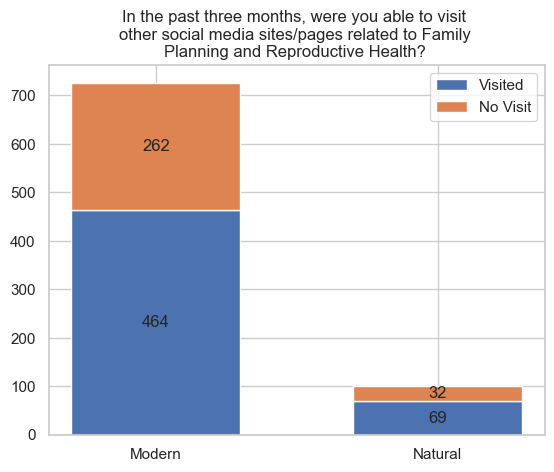

Visited YES- 464
No Visit YES- 69
Visited NO- 262
No Visit NO- 32


In [138]:
labels = ['Modern','Natural']

label1 = {
    'Visited' : np.array([a,b]),
    'No Visit' : np.array([c,d])
}

fig, ax = plt.subplots()
bottom = np.zeros(2)
width = 0.6

for xx, xxc in label1.items():
    p = ax.bar(labels, xxc, width, label=xx, bottom=bottom)
    bottom += xxc

    ax.bar_label(p, label_type='center')

ax.set_title('In the past three months, were you able to visit \nother social media sites/pages related to Family \nPlanning and Reproductive Health? ')
ax.legend()

plt.show()

print("Visited YES- " + str (a))
print("No Visit YES- " + str (b))
print("Visited NO- " + str (c))
print("No Visit NO- " + str (d))


In [139]:
contingency_table = pd.crosstab(cdata1['visuals'], cdata1['conversion3'])
print("Contingency Table:\n", contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
print("\nH0: There is no significant association between freq of socmed visits and conversion")
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between freq of socmed visits and conversion1.")
else:
    print("Fail to reject the null hypothesis: No significant association found.")

Contingency Table:
 conversion3   0    1
visuals             
1            59   55
2            58   71
3            77  122
4            16   79
5            31   45
6            53  161

Chi-Square Statistic: 45.193231551480494
P-Value: 1.3253829366514759e-08
Degrees of Freedom: 5
Expected Frequencies:
 [[ 40.52720677  73.47279323]
 [ 45.85973398  83.14026602]
 [ 70.74486094 128.25513906]
 [ 33.77267231  61.22732769]
 [ 27.01813785  48.98186215]
 [ 76.07738815 137.92261185]]

H0: There is no significant association between freq of socmed visits and conversion
Reject the null hypothesis: There is a significant association between freq of socmed visits and conversion1.


#### Logistic Model

In [140]:
print(cdata1.columns.tolist())

['age', 'job', 'educ', 'female', 'genderid', 'loc', 'device', 'purpose', 'rh_needs', 'benefit', 'platforms', 'oftenvisit', 'learnpage', 'contents', 'visuals', 'civil', 'social', 'conversion3', 'tag', 'age_bracket']


In [141]:
temp['conversion3'] = label_encoder.fit_transform(cdata1['conversion3'])
temp['age_bracket'] = label_encoder.fit_transform(cdata1['age_bracket'])
temp['job'] = label_encoder.fit_transform(cdata1['job'])
temp['educ'] = label_encoder.fit_transform(cdata1['educ'])

temp['female'] = label_encoder.fit_transform(cdata1['female'])
temp['genderid'] = label_encoder.fit_transform(cdata1['genderid'])
temp['civil'] = label_encoder.fit_transform(cdata1['civil'])
temp['purpose'] = label_encoder.fit_transform(cdata1['purpose'])

temp['rh_needs'] = label_encoder.fit_transform(cdata1['rh_needs'])
temp['benefit'] = label_encoder.fit_transform(cdata1['benefit'])
temp['platforms'] = label_encoder.fit_transform(cdata1['platforms'])
temp['oftenvisit'] = label_encoder.fit_transform(cdata1['oftenvisit'])

temp['learnpage'] = label_encoder.fit_transform(cdata1['learnpage'])
temp['contents'] = label_encoder.fit_transform(cdata1['contents'])
temp['visuals'] = label_encoder.fit_transform(cdata1['visuals'])
temp['social'] = label_encoder.fit_transform(cdata1['social'])




X = temp[['age_bracket', 'job', 'educ', 
          'female','genderid','civil','purpose',
          'rh_needs','benefit','platforms','oftenvisit',
          'learnpage','contents','visuals','social'
          ]]
y = temp['conversion3']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\n\nFeatures vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.526641
         Iterations 6


Features vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion3   No. Observations:                  827
Model:                          Logit   Df Residuals:                      812
Method:                           MLE   Df Model:                           14
Date:                Fri, 31 Jan 2025   Pseudo R-squ.:                  0.1908
Time:                        15:44:35   Log-Likelihood:                -435.53
converged:                       True   LL-Null:                       -538.20
Covariance Type:            nonrobust   LLR p-value:                 4.458e-36
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age_bracket    -0.0834      0.142     -0.589      0.556      -0.361       0.1

###### Analysis
significant (p<0.05) for the logistic model <br/>
 (meaning if all paramter is accounted for)
* educ
* benefit 
* platforms 
* oftenvisit
* learnpage 
* contents